# Ng Feng Long - ITI103_Assignment 1

## Machine Learning Problem Formulation

### Assignment Overview
This assignment aims to develop a machine learning model that predicts houose prices based on variety of features. By utilizing historical sales data, this model will provide HousePricePredict Inc and relevant stakeholders in making informed decisions based on the predicted result.

### Problem Statement
Given a dataset describing various aspects of residential homes, we are predicting the sale price of houses.

**Target Variable** - *SalePrice* -  the property's sale price.

**Features** 

|Feature|Description|
|:--:|:---|
|MSSubClass|Identifies the type of dwelling involved in the sale.	|
|MSZoning|Identifies the general zoning classification of the sale.|
|LotFrontage|Linear feet of street connected to property|
|LotArea|Lot size in square feet|
|Street|Type of road access to property|
|Alley|Type of alley access to property|
|LotShape|General shape of property|
|LandContour|Flatness of the property|
|Utilities|Type of utilities available|
|LotConfig|Lot configuration|
|LandSlope|Slope of property|
|Neighborhood|Physical locations within Ames city limits|
|Condition1|Proximity to various conditions|
|Condition2|Proximity to various conditions (if more than one is present)|
|BldgType|Type of dwelling|
|HouseStyle|Style of dwelling|
|OverallQual|Rates the overall material and finish of the house|
|OverallCond|Rates the overall condition of the house|
|YearBuilt|Original construction date|
|YearRemodAdd|Remodel date (same as construction date if no remodeling or additions)|
|RoofStyle|Type of roof|
|RoofMatl|Roof material|
|Exterior1st|Exterior covering on house|
|Exterior2nd|Exterior covering on house (if more than one material)|
|MasVnrType|Masonry veneer type|
|MasVnrArea|Masonry veneer area in square feet|
|ExterQual|Evaluates the quality of the material on the exterior |
|ExterCond|Evaluates the present condition of the material on the exterior|
|Foundation|Type of foundation|
|BsmtQual|Evaluates the height of the basement|
|BsmtCond|Evaluates the general condition of the basement|
|BsmtExposure|Refers to walkout or garden level walls|
|BsmtFinType1|Rating of basement finished area|
|BsmtFinSF1|Type 1 finished square feet|
|BsmtFinType2|Rating of basement finished area (if multiple types)|
|BsmtFinSF2|Type 2 finished square feet|
|BsmtUnfSF|Unfinished square feet of basement area|
|TotalBsmtSF|Total square feet of basement area|
|Heating|Type of heating|
|HeatingQC|Heating quality and condition|
|CentralAir|Central air conditioning|
|Electrical|Electrical system|
|1stFlrSF|First Floor square feet|
|2ndFlrSF|Second floor square feet|
|LowQualFinSF|Low quality finished square feet (all floors)|
|GrLivArea|Above grade (ground) living area square feet|
|BsmtFullBath|Basement full bathrooms|
|BsmtHalfBath|Basement half bathrooms|
|FullBath|Full bathrooms above grade|
|HalfBath|Half baths above grade|
|Bedroom|Bedrooms above grade (does NOT include basement bedrooms)|
|Kitchen|Kitchens above grade|
|KitchenQual|Kitchen quality|
|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)|
|Functional|Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|Number of fireplaces|
|FireplaceQu|Fireplace quality|
|GarageType|Garage location|
|GarageYrBlt|Year garage was built|
|GarageFinish|Interior finish of the garage|
|GarageCars|Size of garage in car capacity|
|GarageArea|Size of garage in square feet|
|GarageQual|Garage quality|
|GarageCond|Garage condition|
|PavedDrive|Paved driveway|
|WoodDeckSF|Wood deck area in square feet|
|OpenPorchSF|Open porch area in square feet|
|EnclosedPorch|Enclosed porch area in square feet|
|3SsnPorch|Three season porch area in square feet|
|ScreenPorch|Screen porch area in square feet|
|PoolArea|Pool area in square feet|
|PoolQC|Pool quality|
|Fence|Fence quality|
|MiscFeature|Miscellaneous feature not covered in other categories|
|MiscVal|$Value of miscellaneous feature|
|MoSold|Month Sold (MM)|
|YrSold|Year Sold (YYYY)|
|SaleType|Type of sale	|
|SaleCondition|Condition of sale|





### Type of Machine Learning Problem
This is a **Supervised Regression Problem** as we are given labeled data with known sale price and the output variable is a continuous measure

In [93]:
# pip install and import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

file_path = ''

In [95]:
# import data
df = pd.read_csv(file_path + 'house_pricing.csv')

## Data Exploration and Understanding

### Basic Data Analysis

To start of with the data exploration, we will do some basic analysis on the given data, such as checking the shape, any null fields and the min/max of the data to identify some obvious erroneous data first

In [99]:
print(df.shape)

df.info()

print(df.describe())

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

It is important to understand the distribution of the target variable, `SalePrice`. This step helps in identifying the range of house prices, any potential outliers, and the overall distribution shape.


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


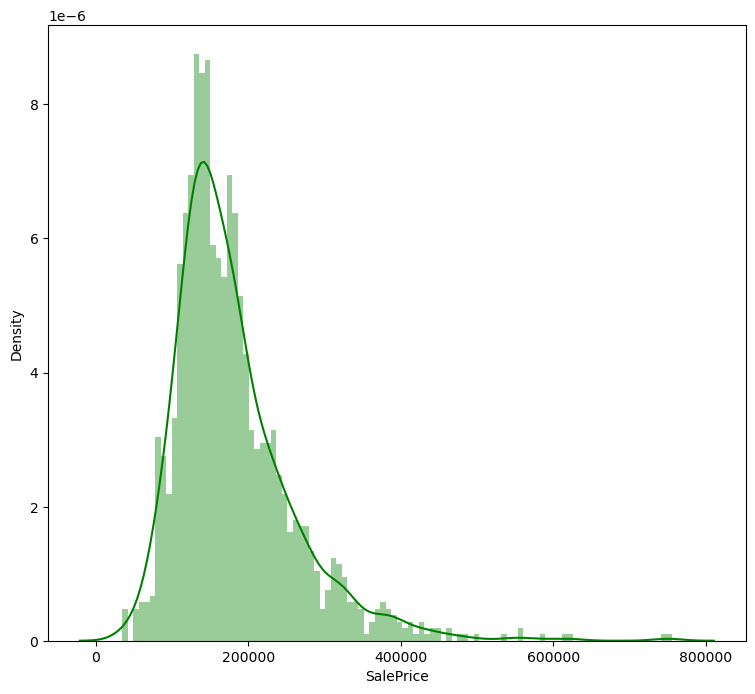

In [101]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

To better understand the dataset and distribution of important variables, we will conduct the initial exploratory data analysis

Each property have a different set of charactersitics, we will take a quick look at the relationship between each feature and the sale price of the property. 

We will also plot the corrleation HeatMap to identify the strenfth and direction of relationships between numeric features and the sale price


In [9]:
# All feature name 
features_names = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

continuous_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold']

categorical_vars  = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType']

ordinal_vars  = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'PoolQC', 'SaleCondition', 'PoolQC', 'FireplaceQu', 'GarageQual','GarageCond'] 

We use a heatmap to visualize the correlation between numeric features, focusing on how they relate to `SalePrice`.


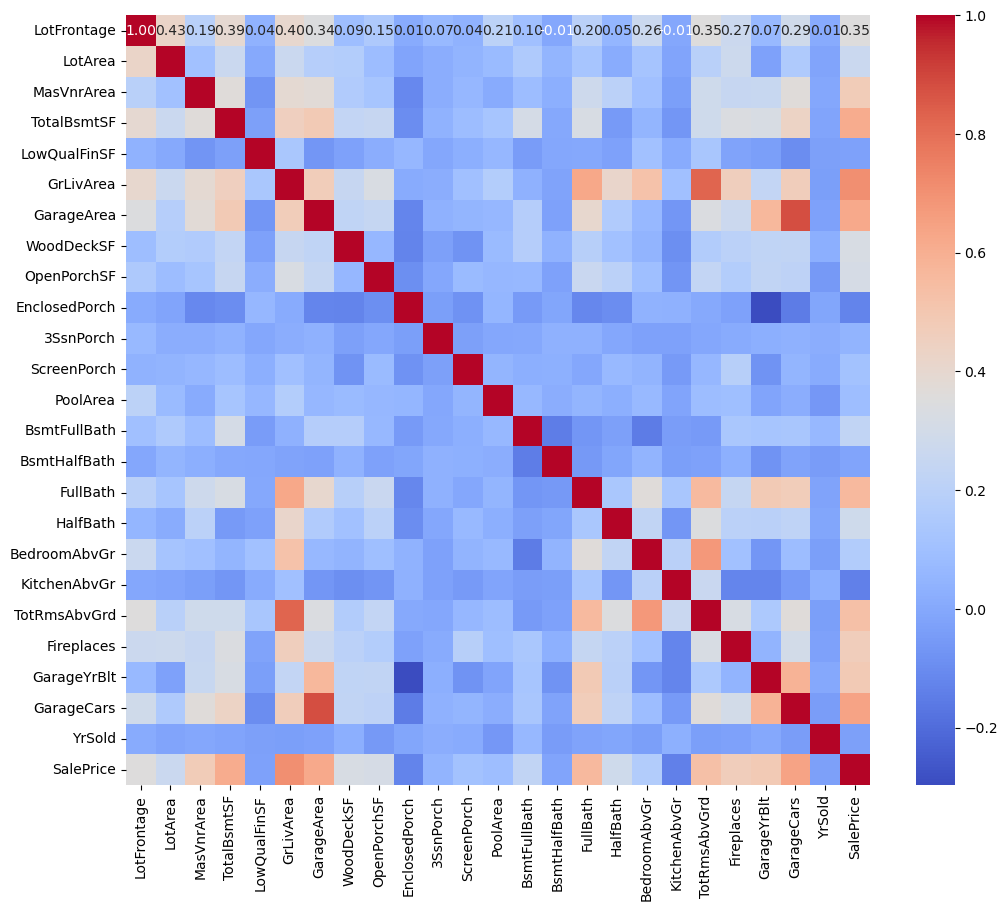

In [104]:
# Correlation matrix for continuous variables
corr_matrix = df[continuous_vars + ['SalePrice']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

We will plot scatterplots to inspect potential linear relationships between continuous variables and SalePrice.

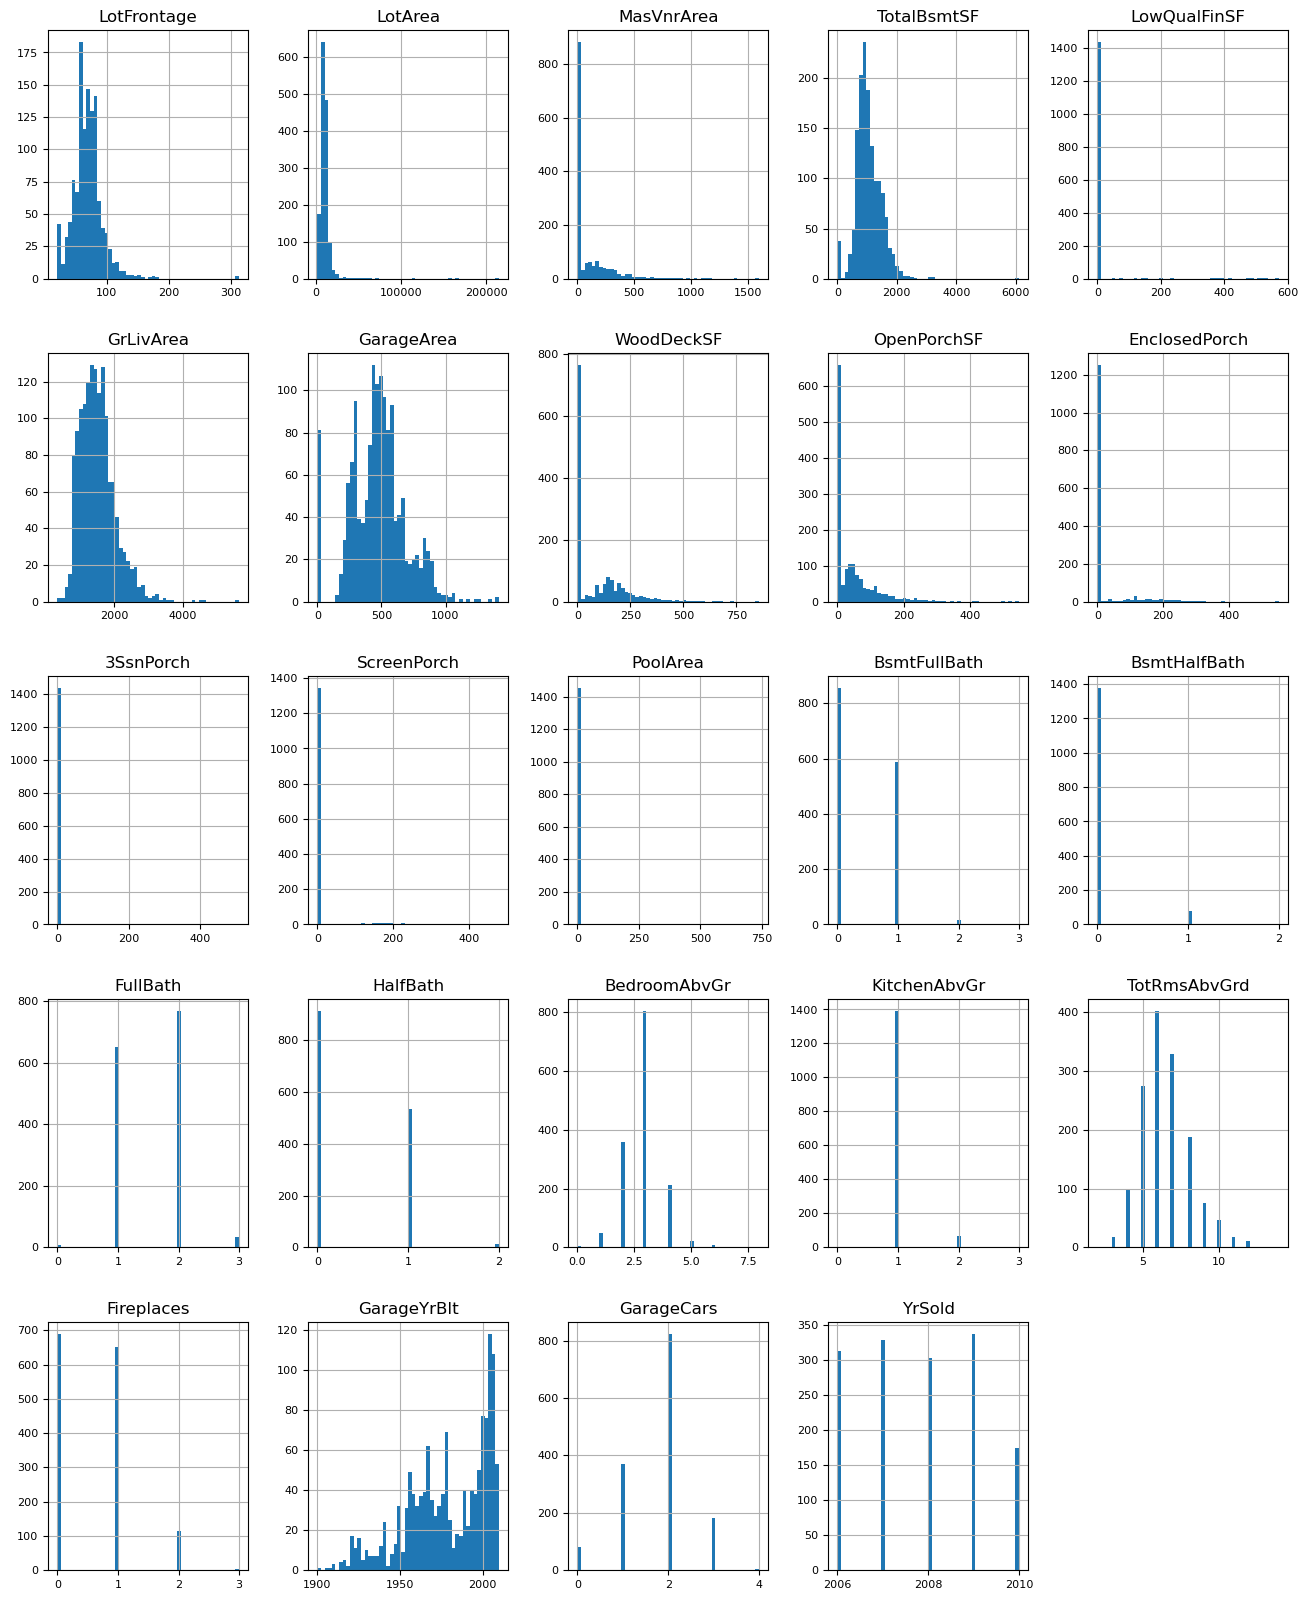

In [106]:

df[continuous_vars].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


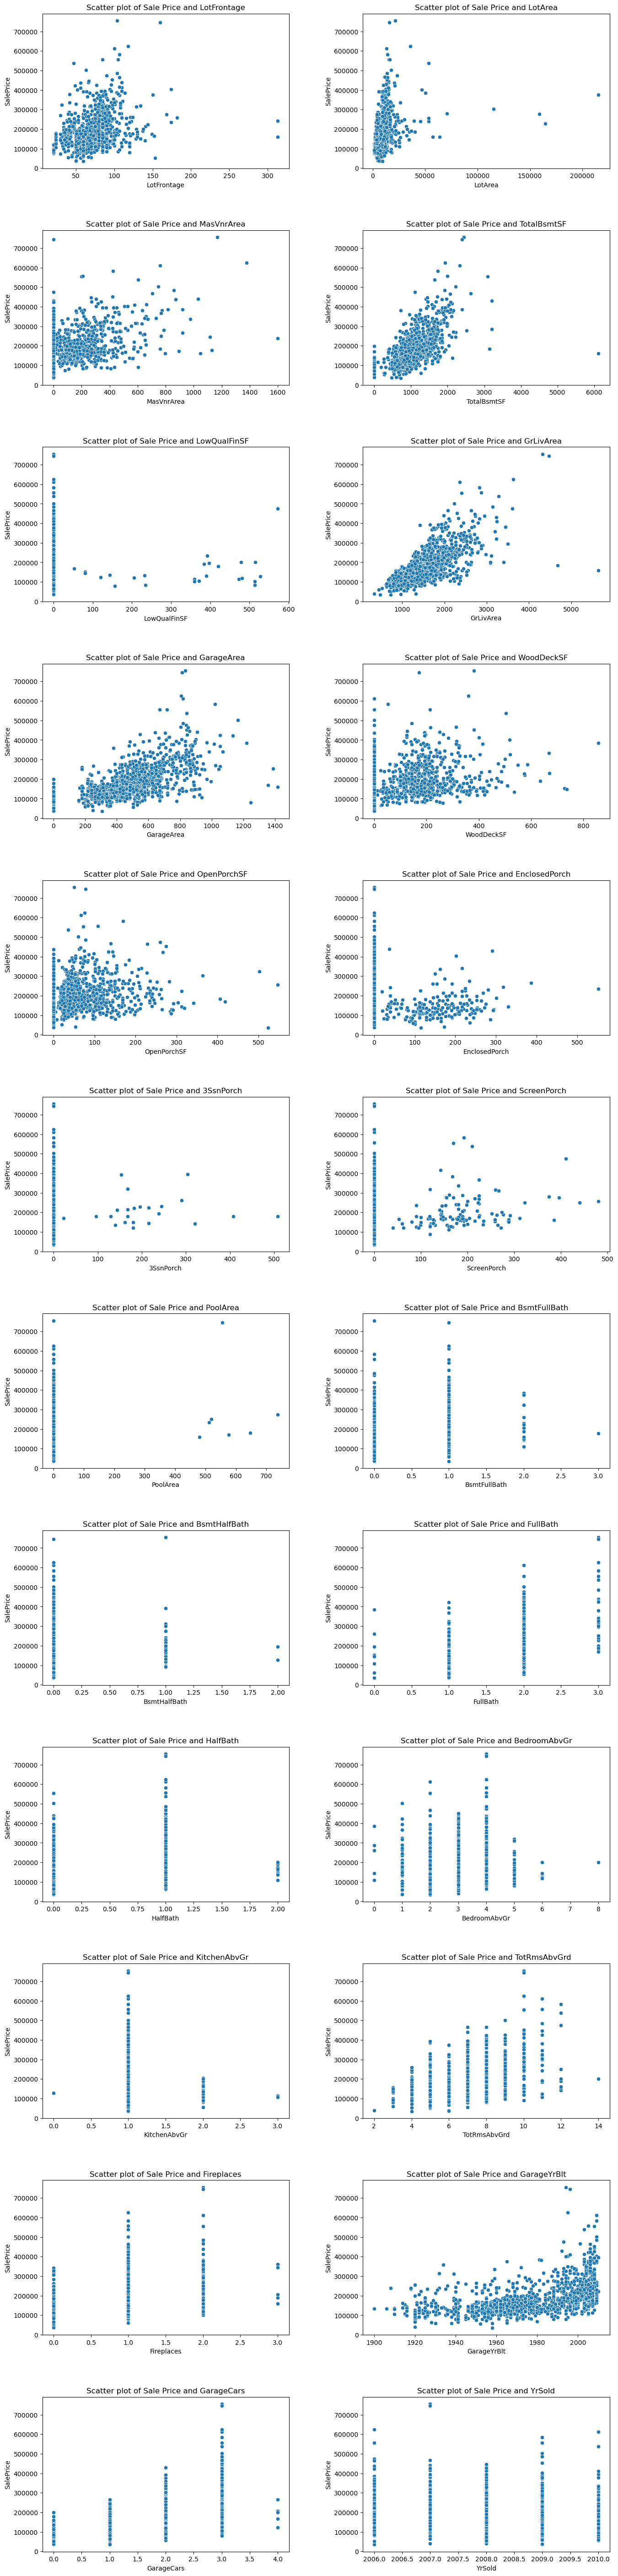

In [108]:
# Define your variables list
variables = continuous_vars

# Determine number of rows needed, 2 plots per row
n_cols = 2
n_rows = (len(variables) + n_cols - 1) // n_cols  # rounds up to ensure all variables are included

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 6 * n_rows))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the spacing between plots

for i, var in enumerate(continuous_vars):
    ax = axes[i // n_cols, i % n_cols]
    sns.scatterplot(data=df, x=var, y='SalePrice', ax=ax)
    ax.set_title(f'Scatter plot of Sale Price and {var}')

# If the number of variables is not a perfect multiple of the grid size, hide the empty subplot(s)
if len(variables) % n_cols != 0:
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j // n_cols, j % n_cols])

plt.show()

Here we plot histograms and density plots for continuous variables to inspect their distribution shapes. This can highlight features with skewness or outliers.

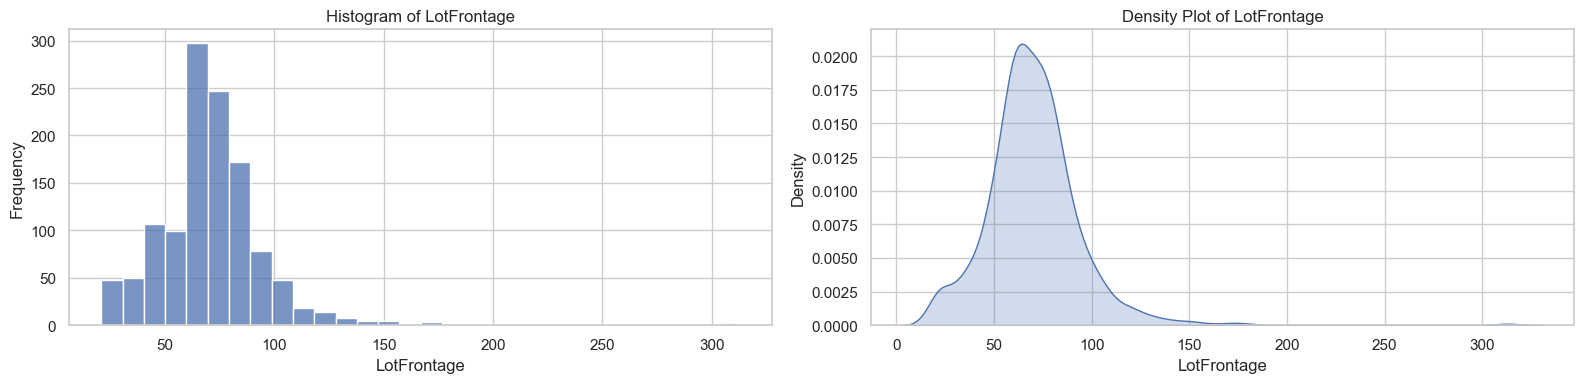

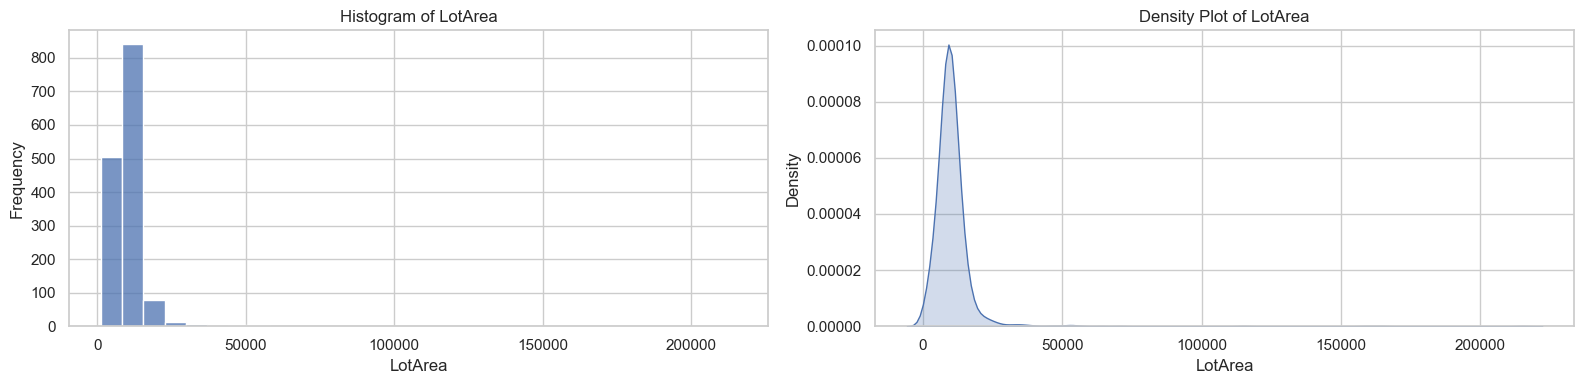

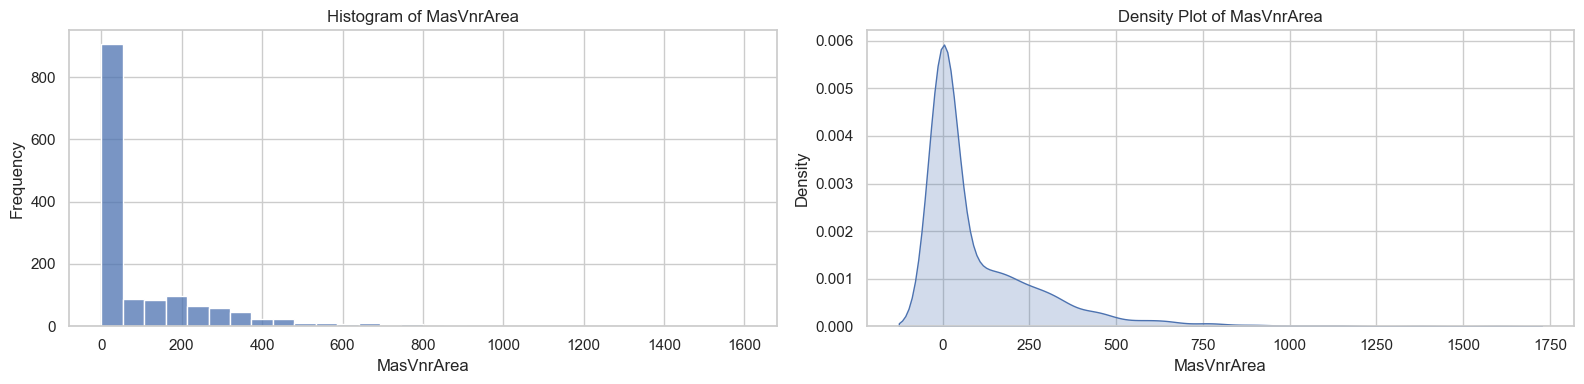

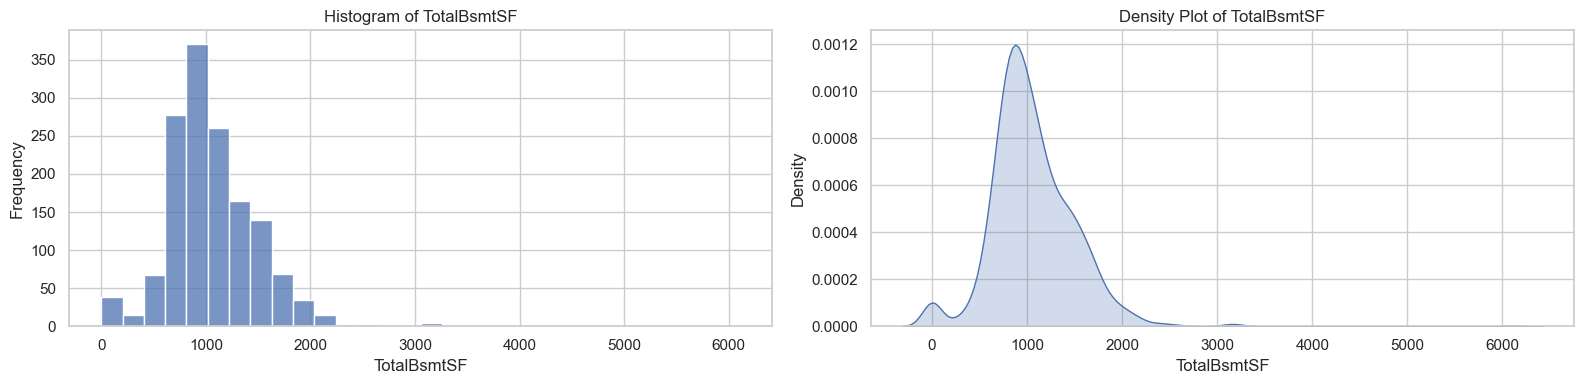

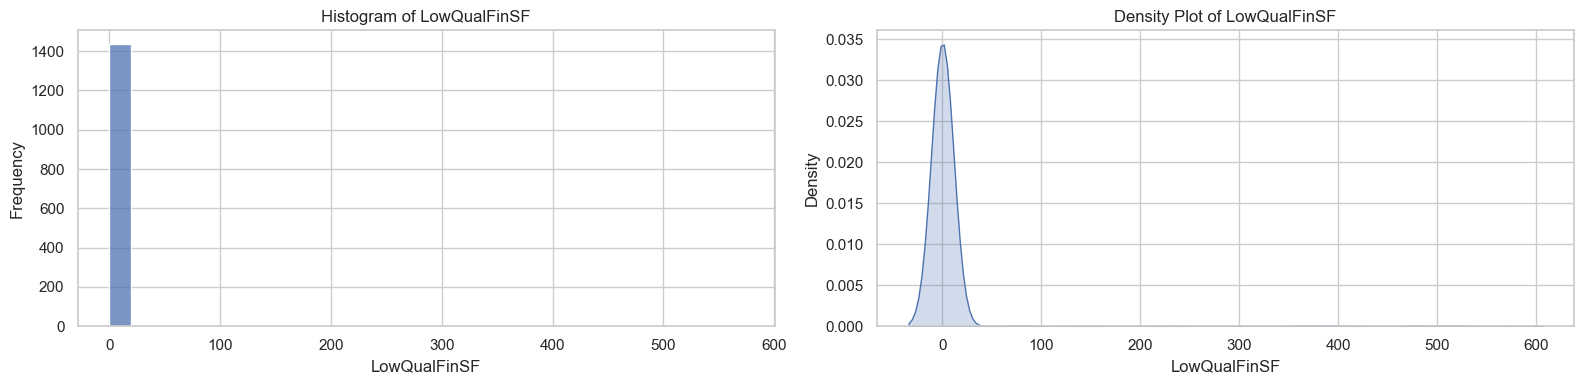

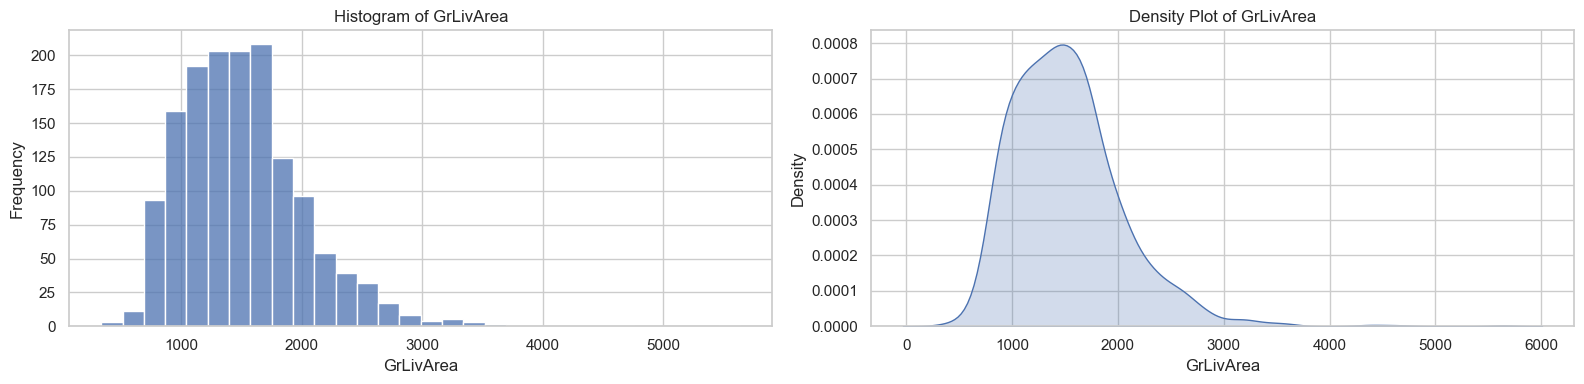

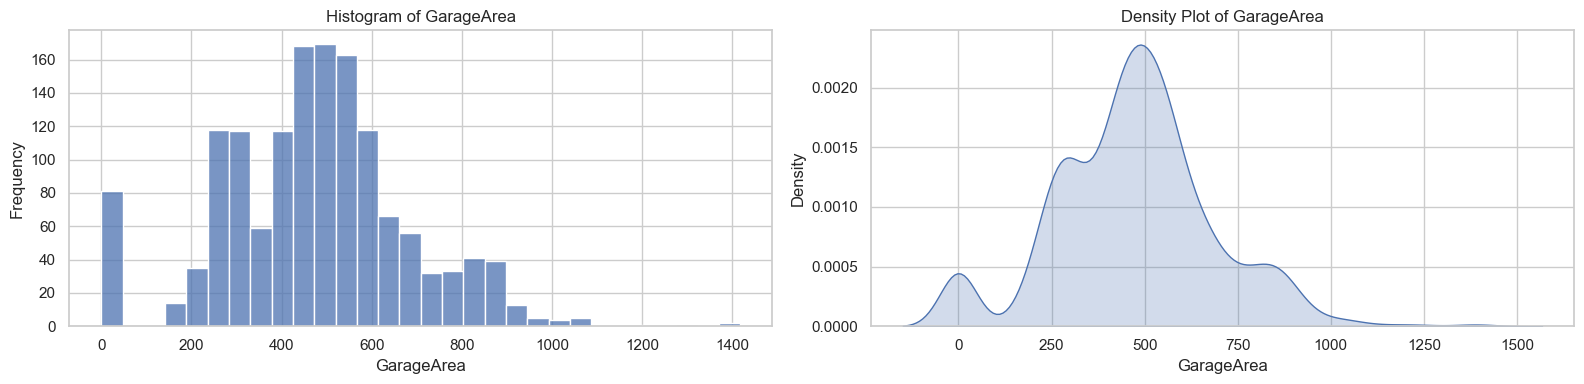

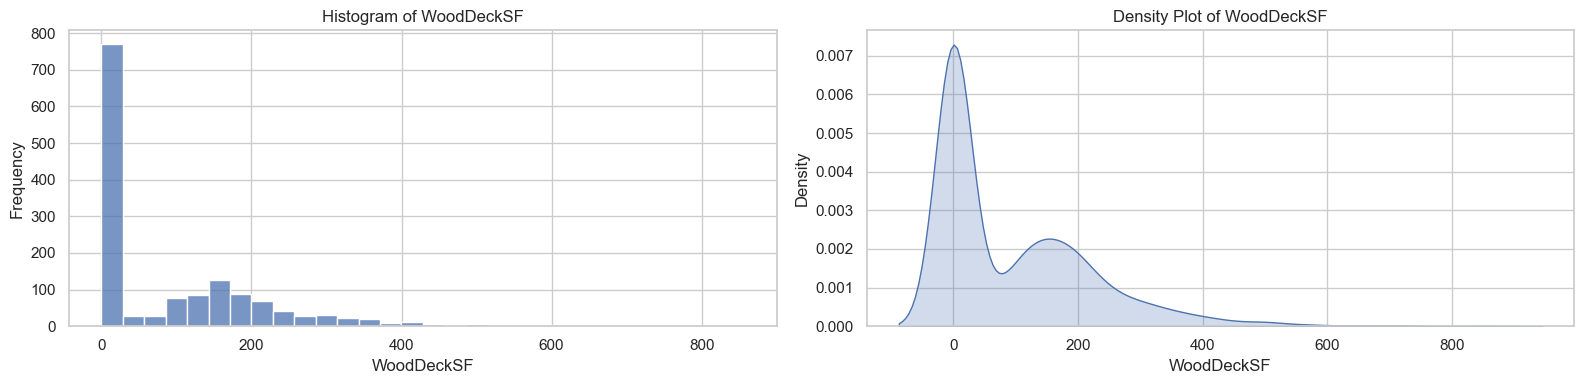

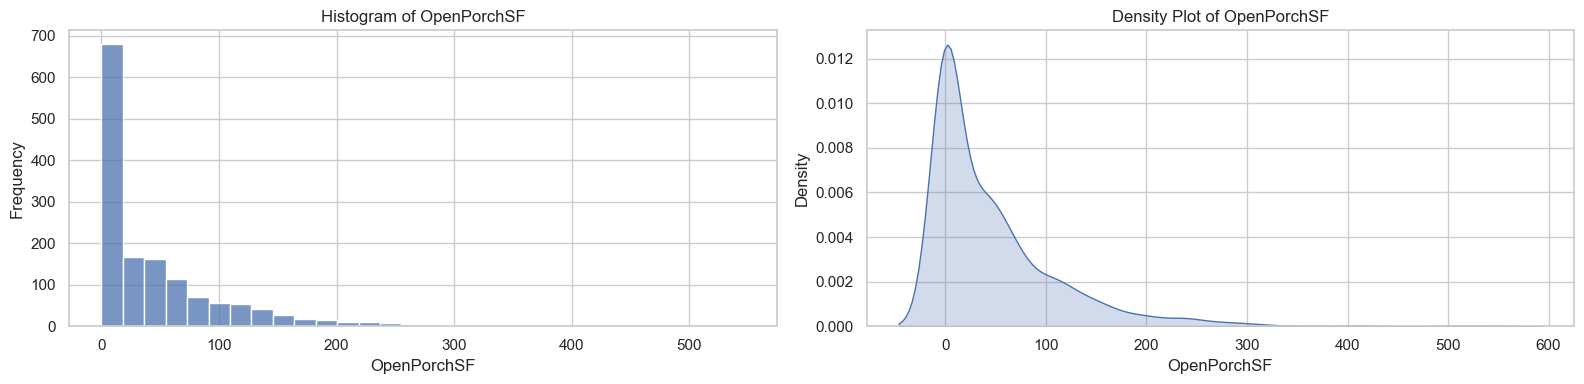

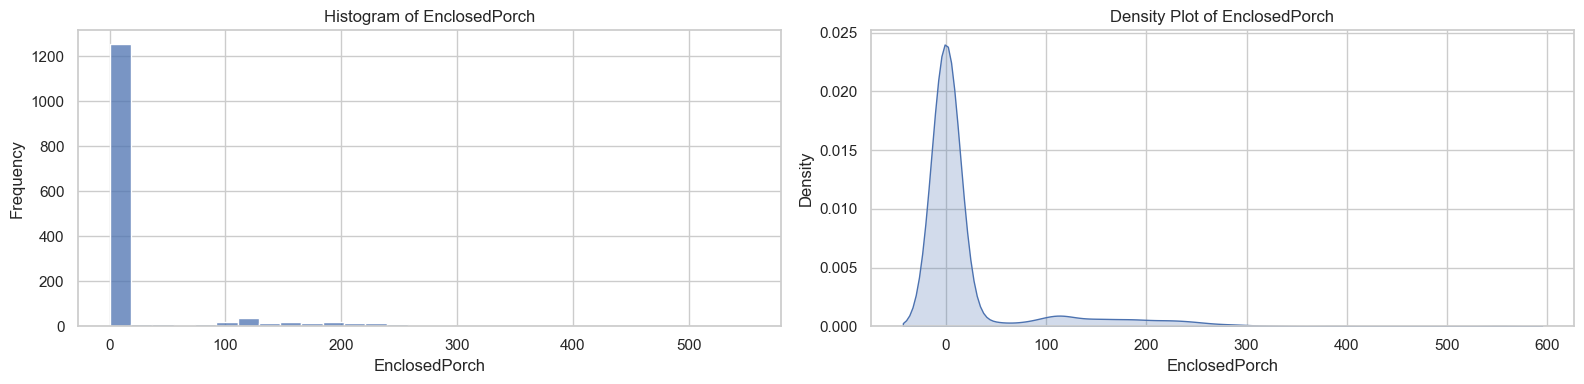

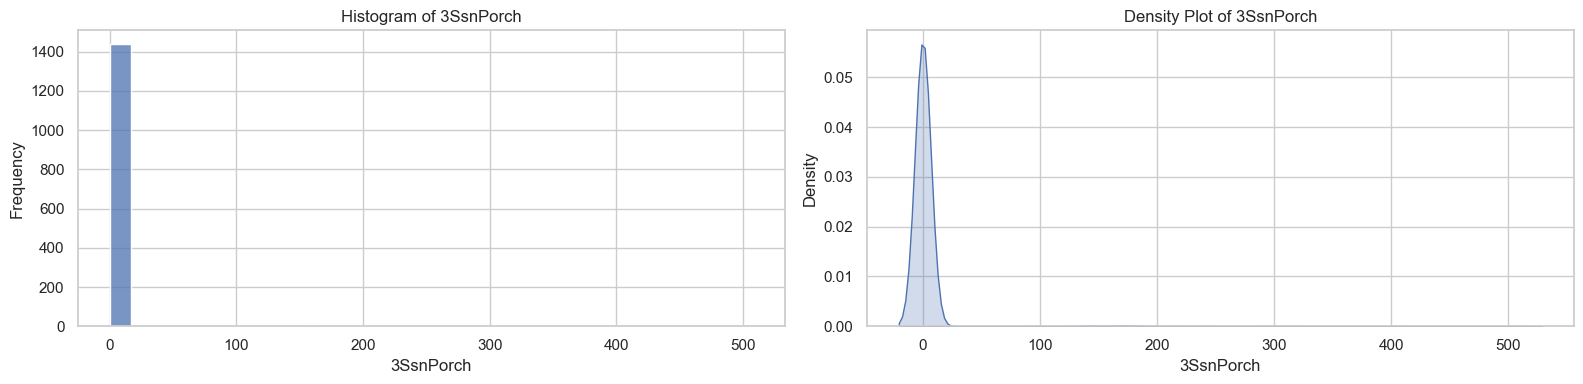

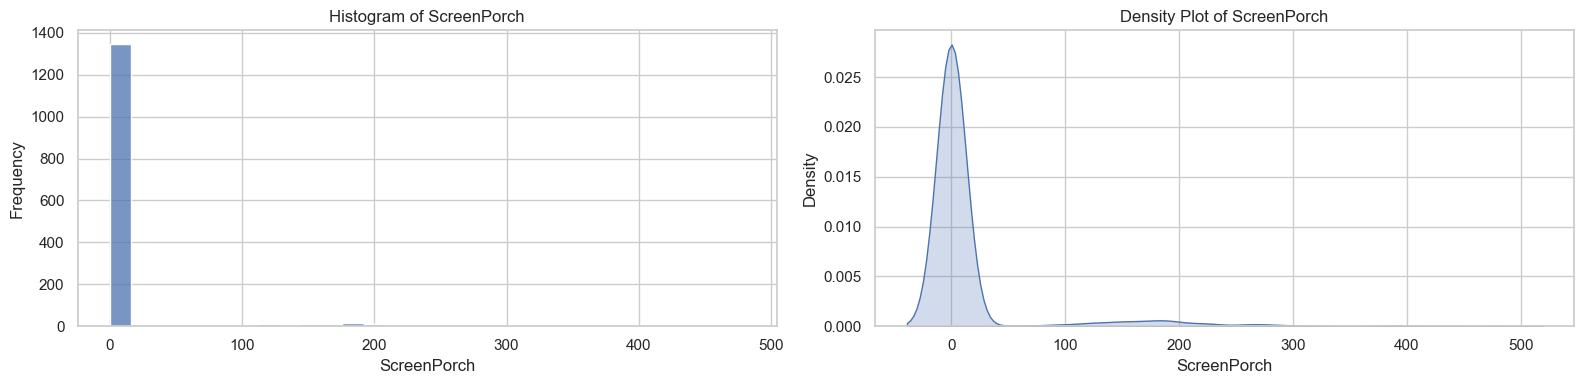

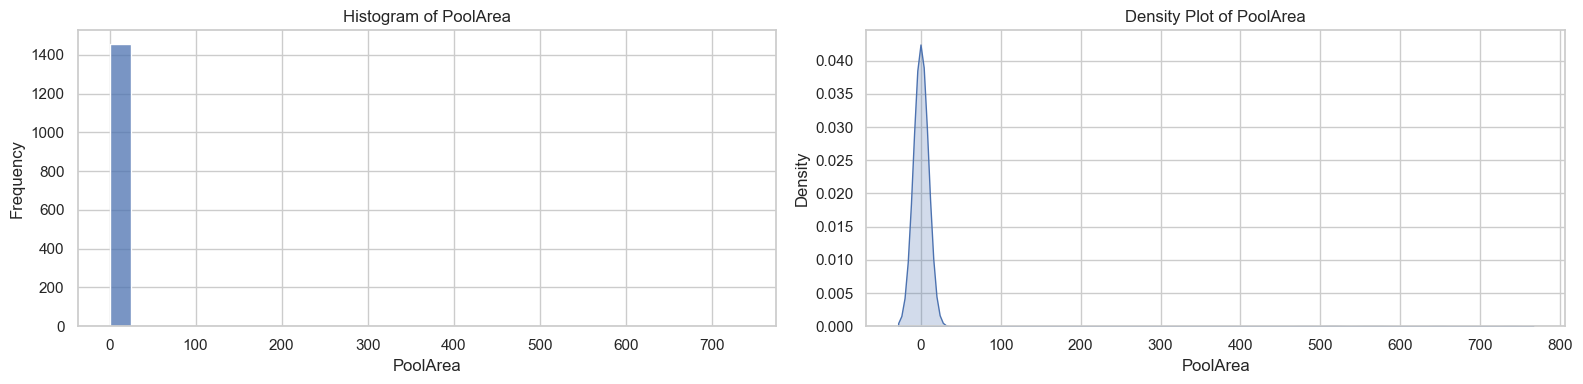

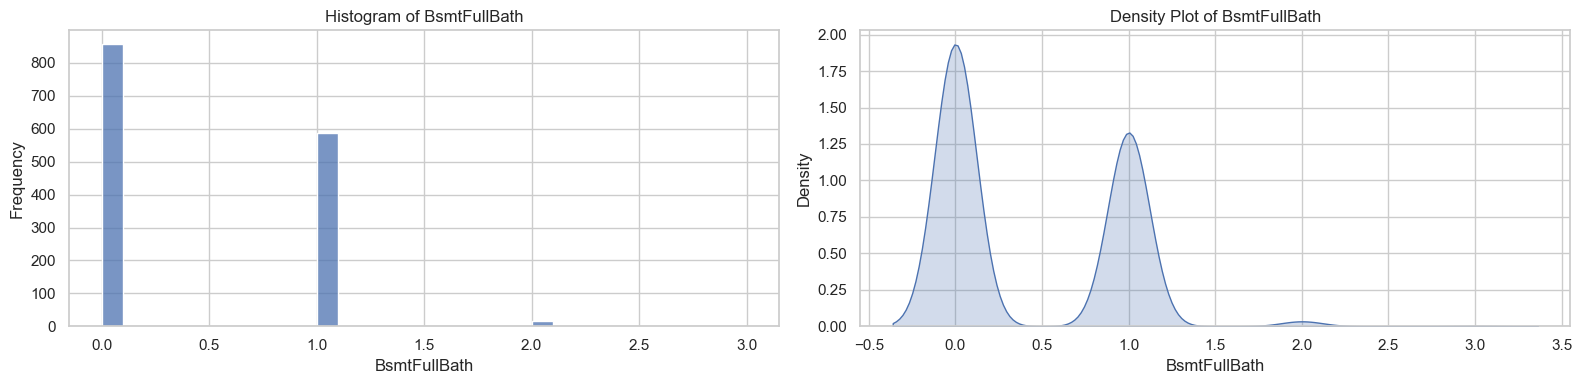

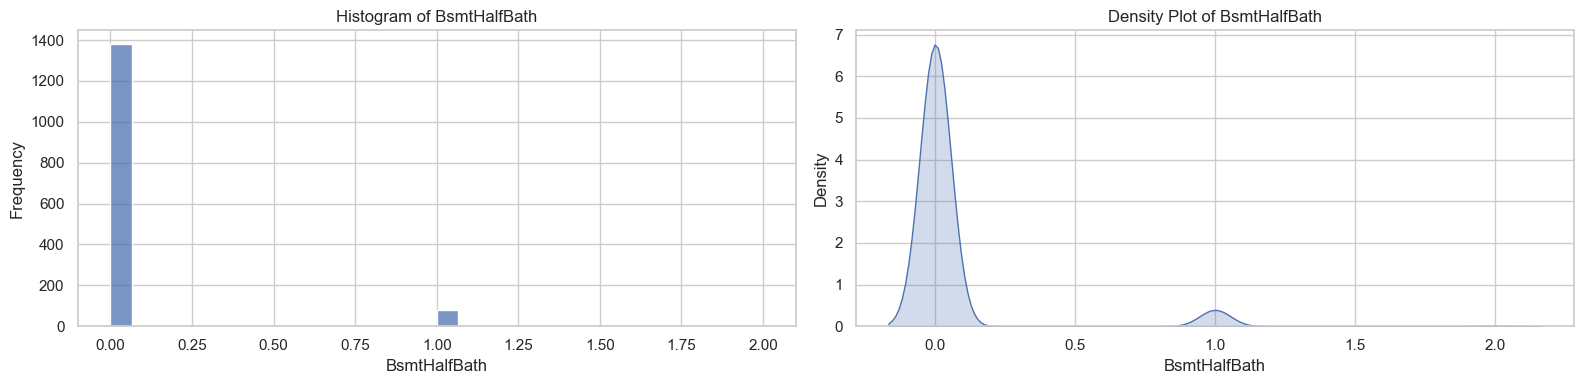

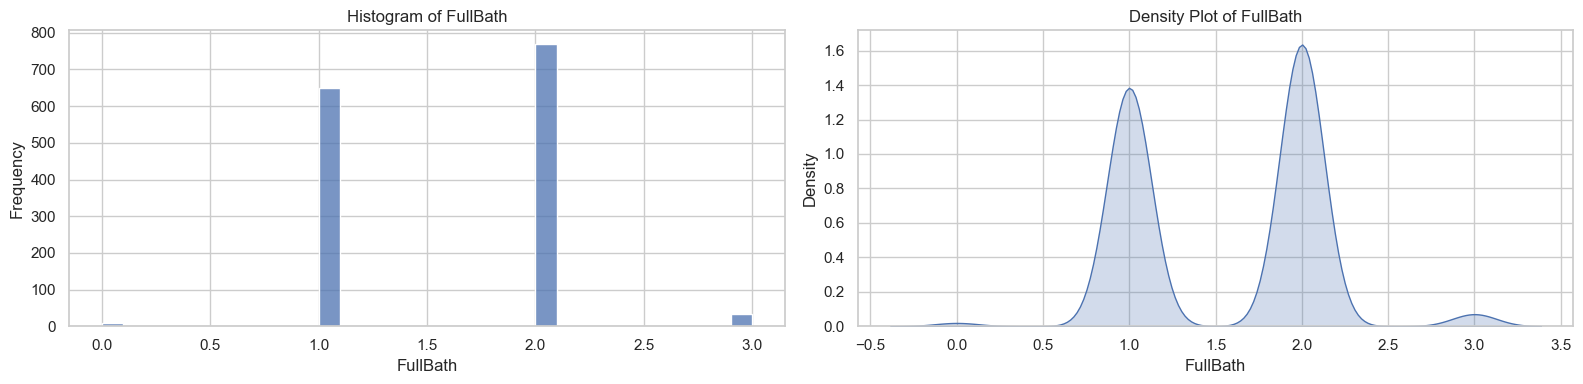

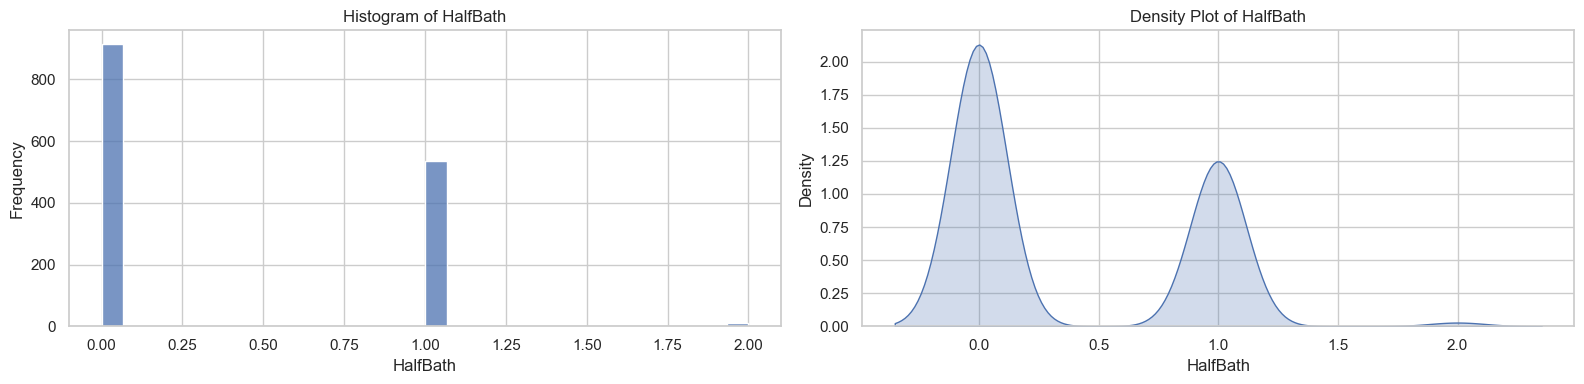

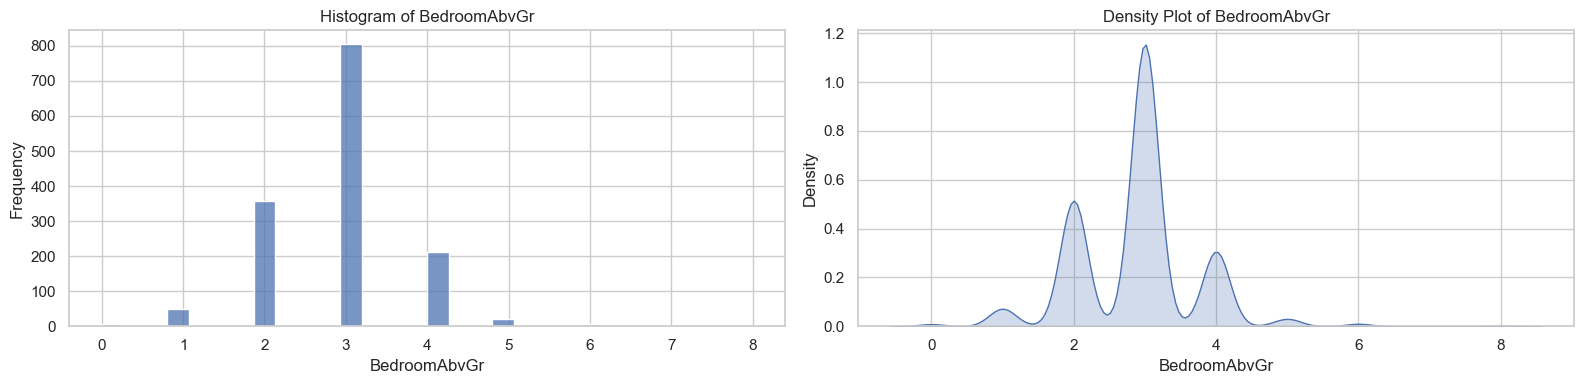

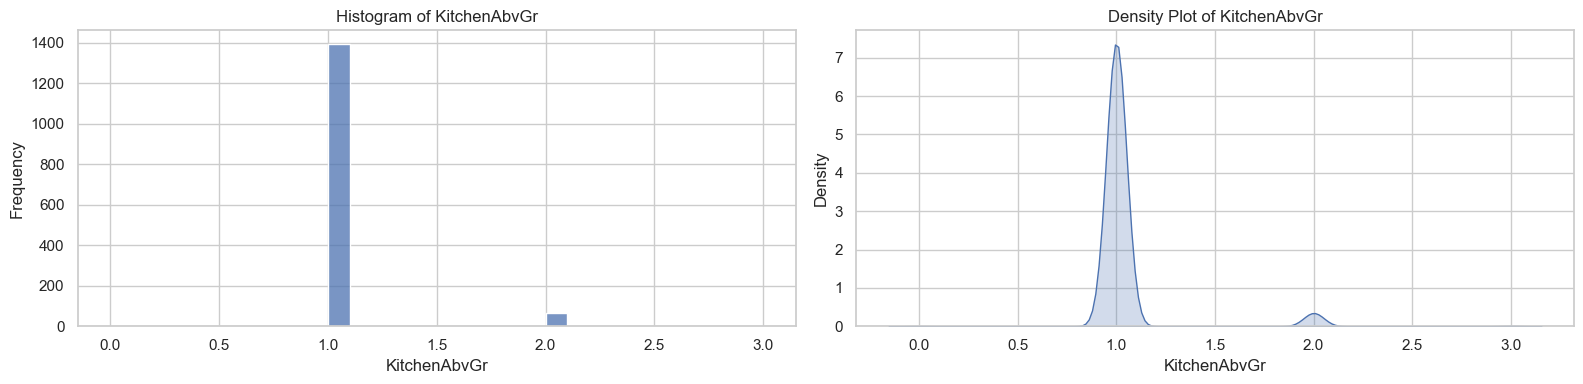

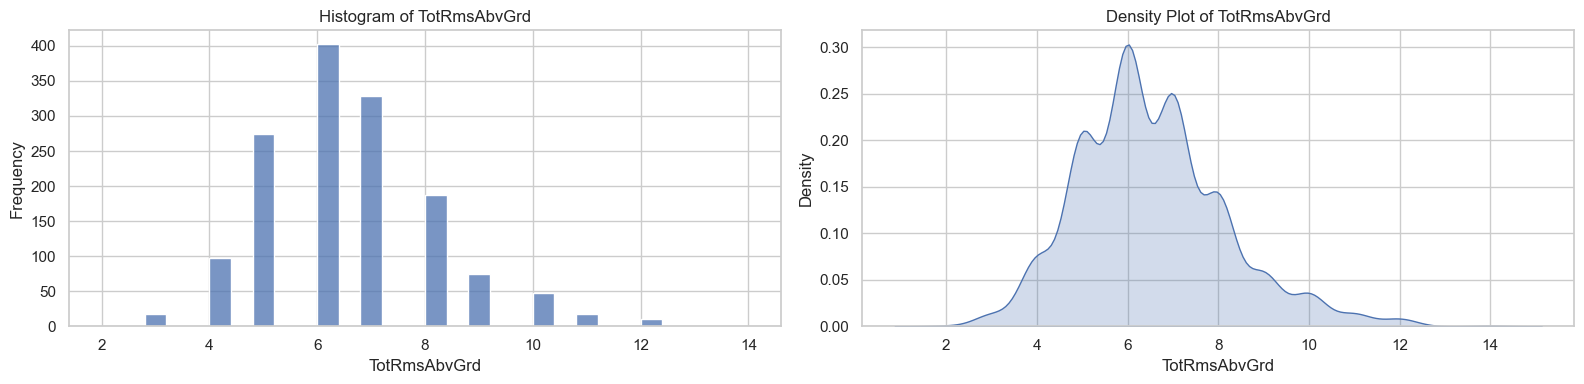

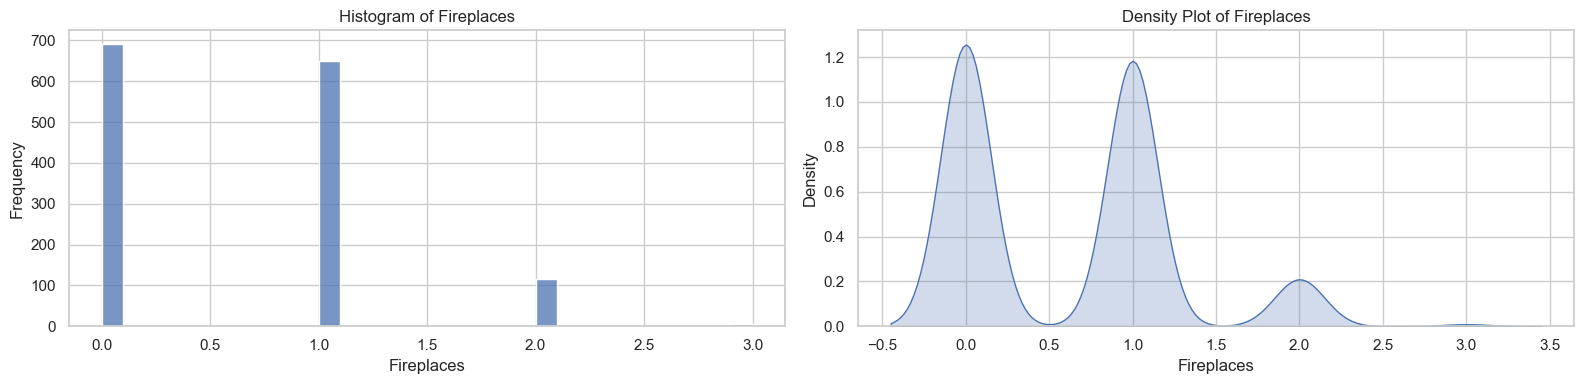

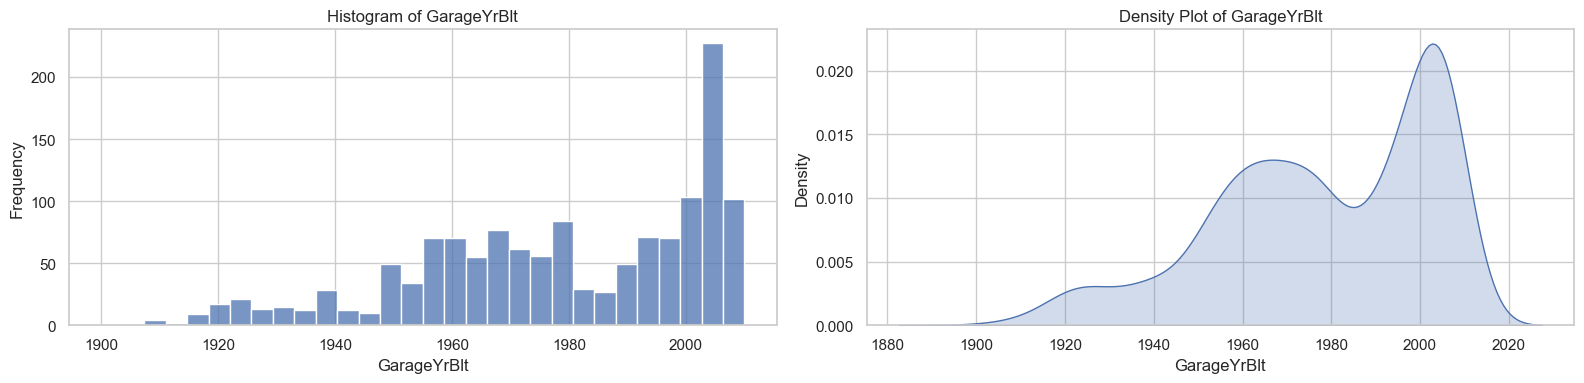

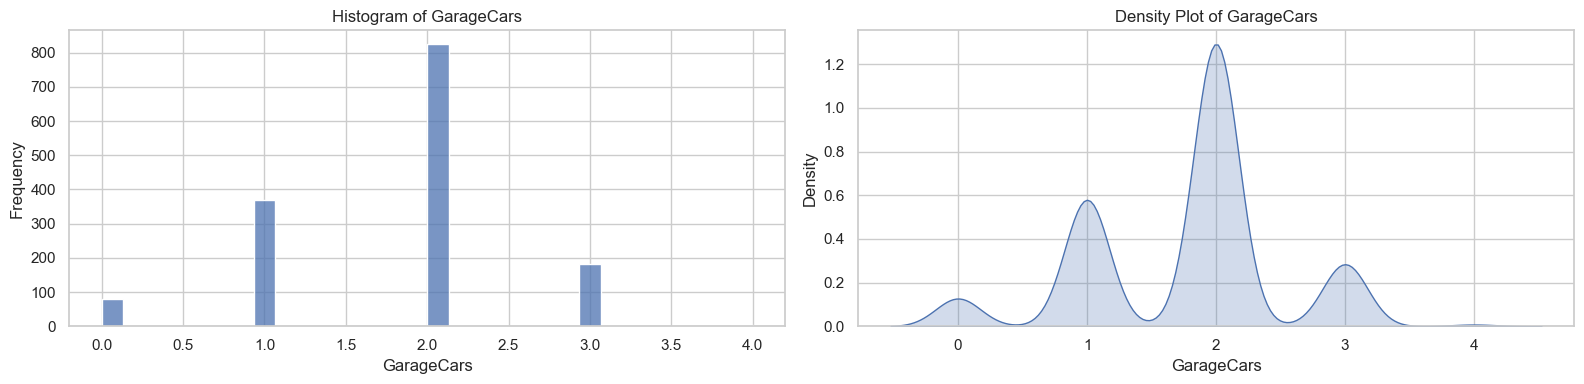

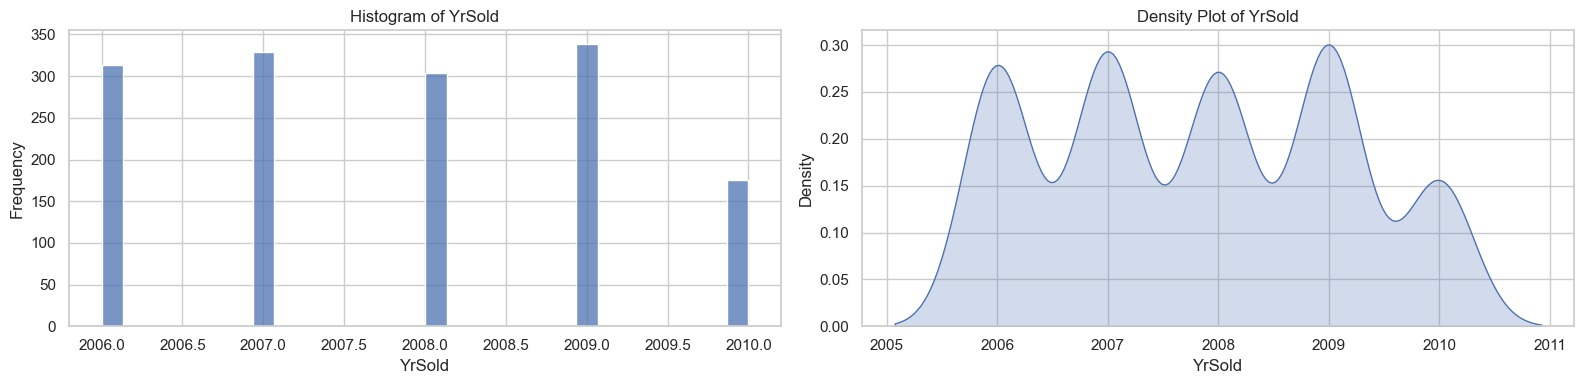

In [110]:
# Setting aesthetic parameters in one step.
sns.set(style="whitegrid")

for var in continuous_vars:
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df[var], bins=30, kde=False, ax=ax[0])
    ax[0].set_title(f'Histogram of {var}')
    ax[0].set_xlabel(var)
    ax[0].set_ylabel('Frequency')

    sns.kdeplot(df[var], ax=ax[1], fill=True)
    ax[1].set_title(f'Density Plot of {var}')
    ax[1].set_xlabel(var)
    ax[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

These plots help us see the distribution of SalePrice across different categories and detect if certain categories have a higher influence.

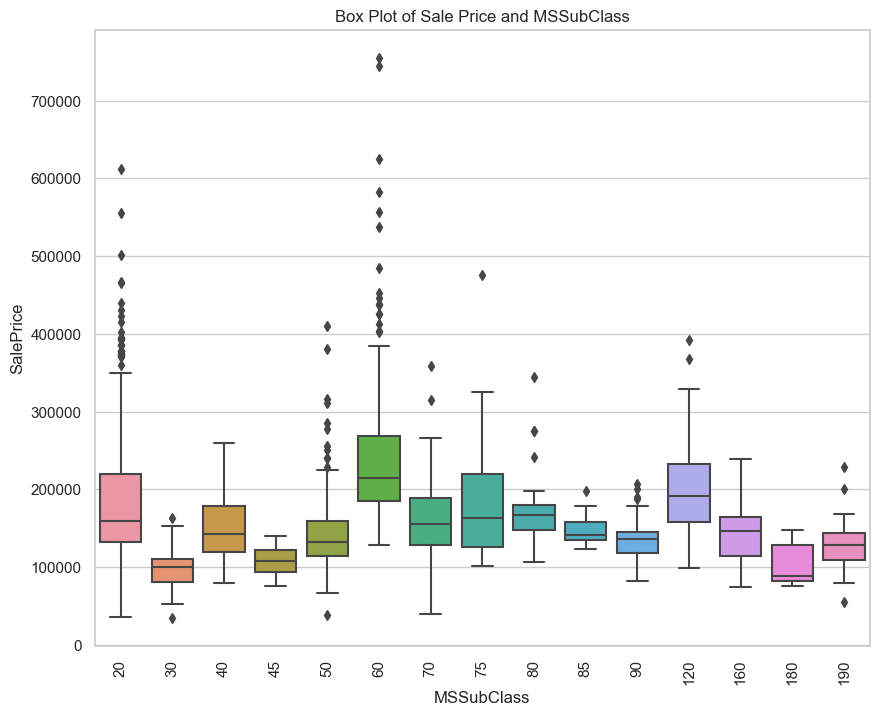

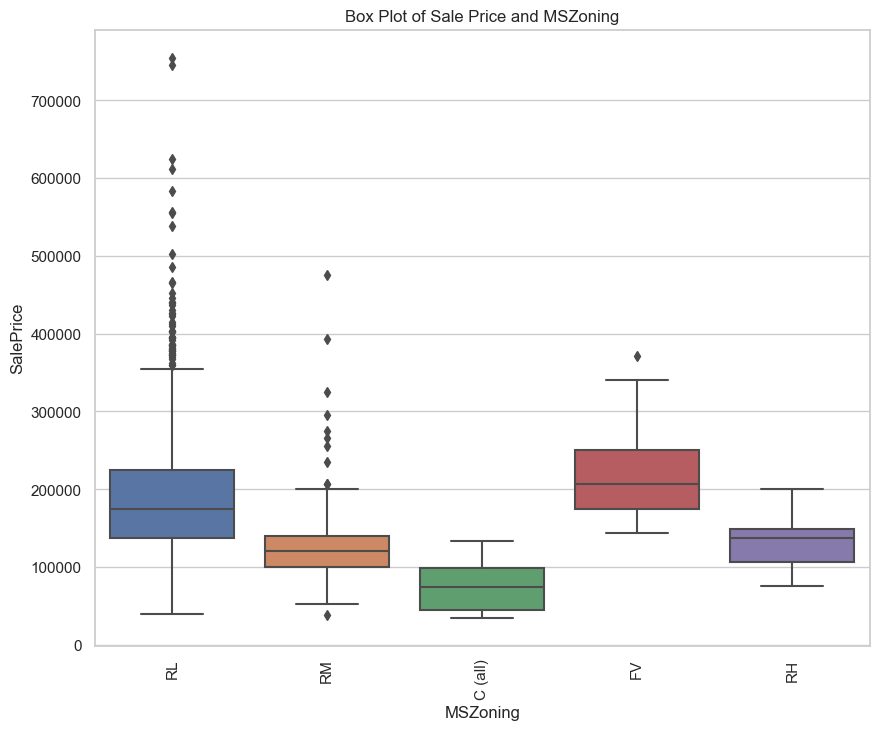

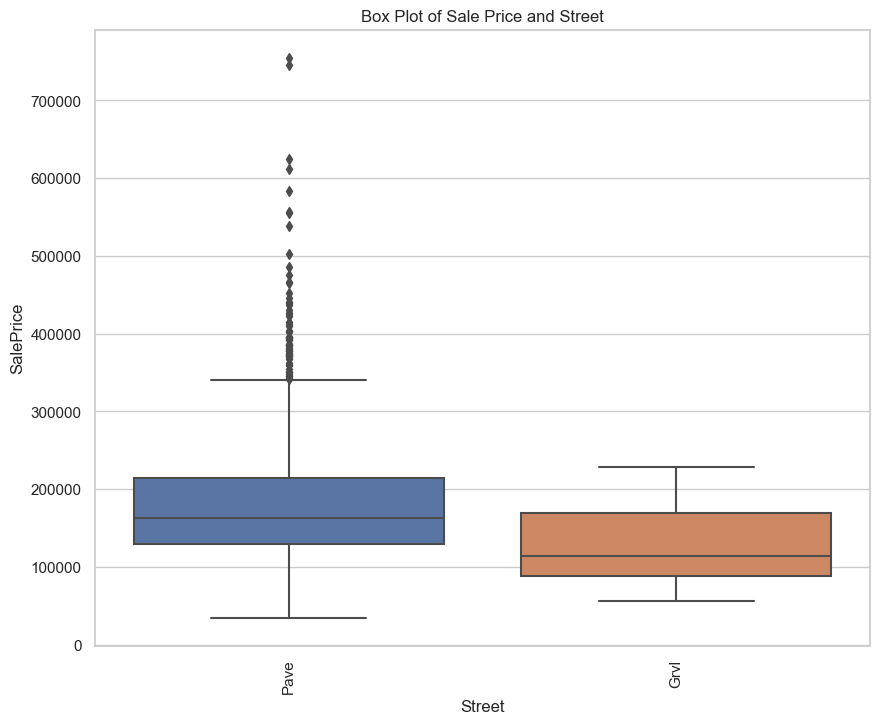

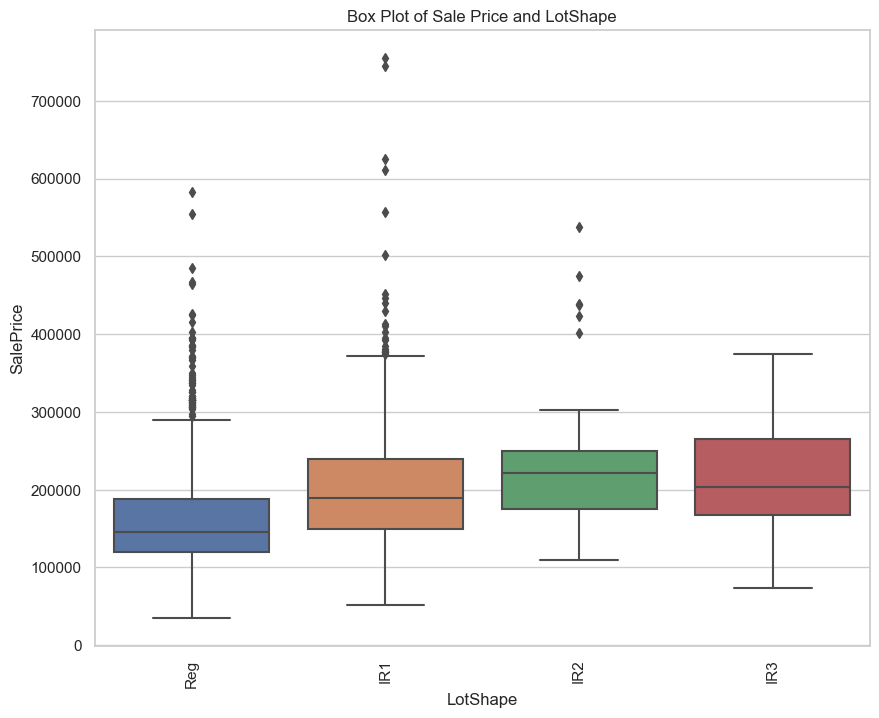

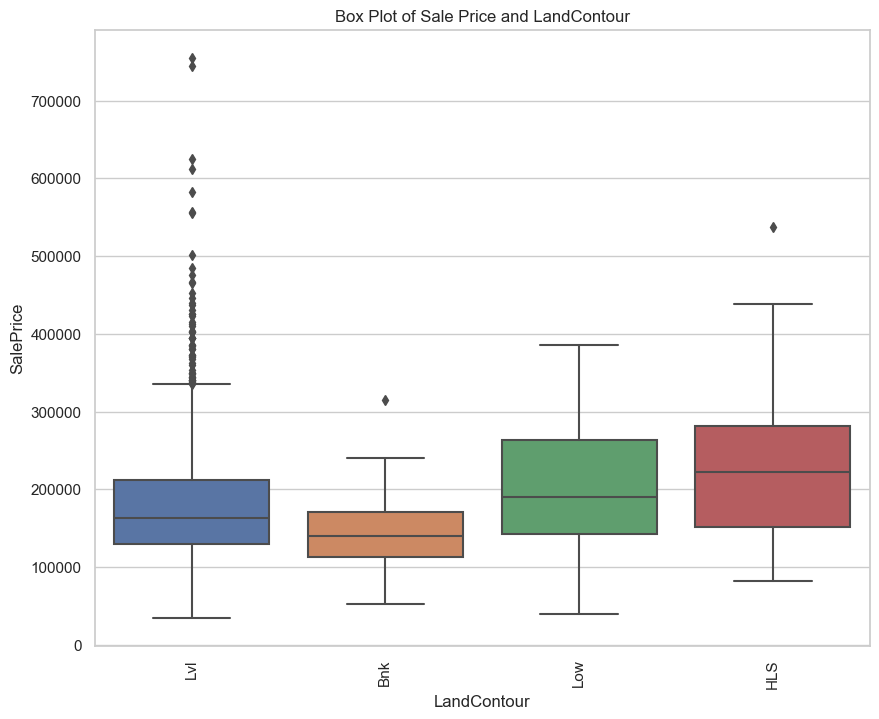

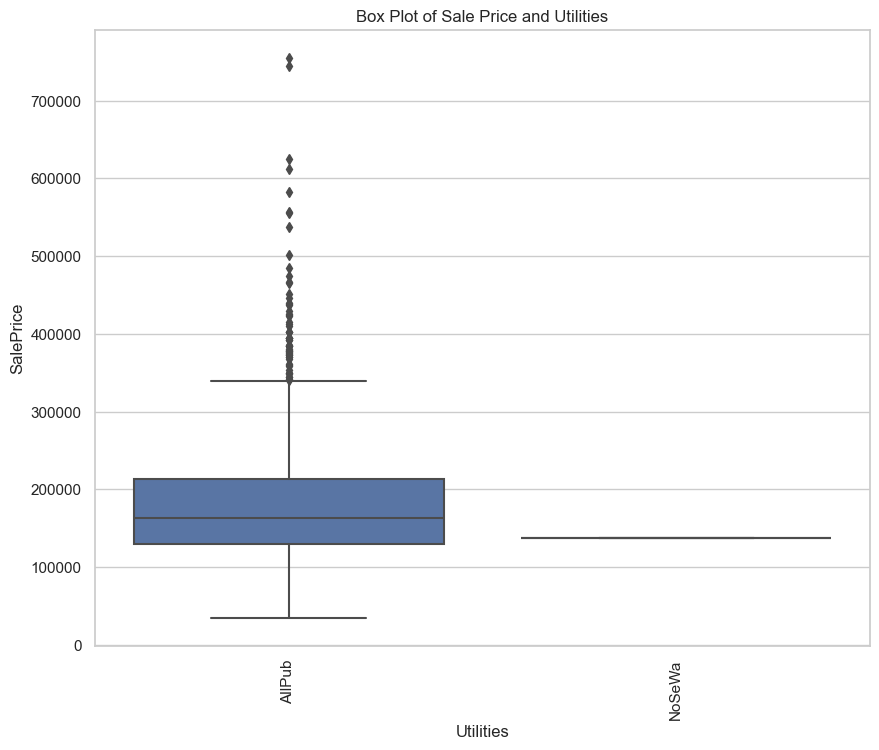

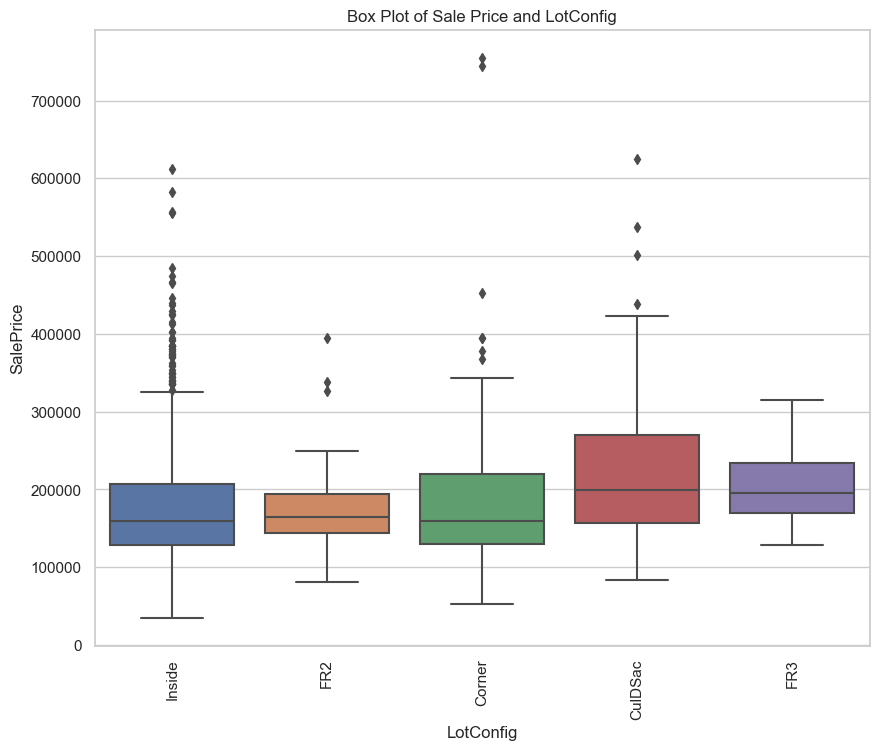

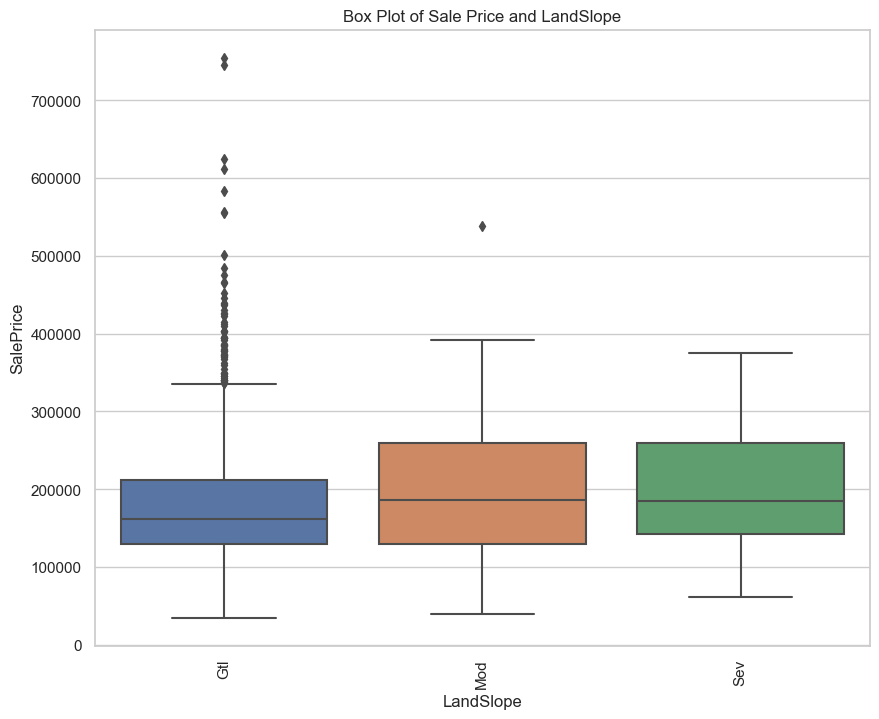

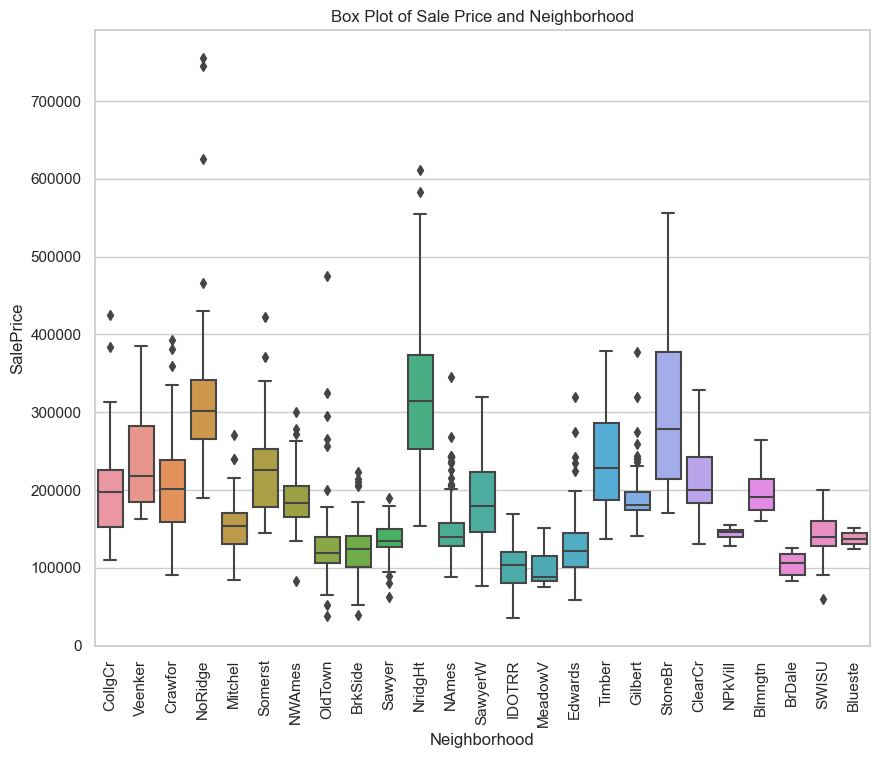

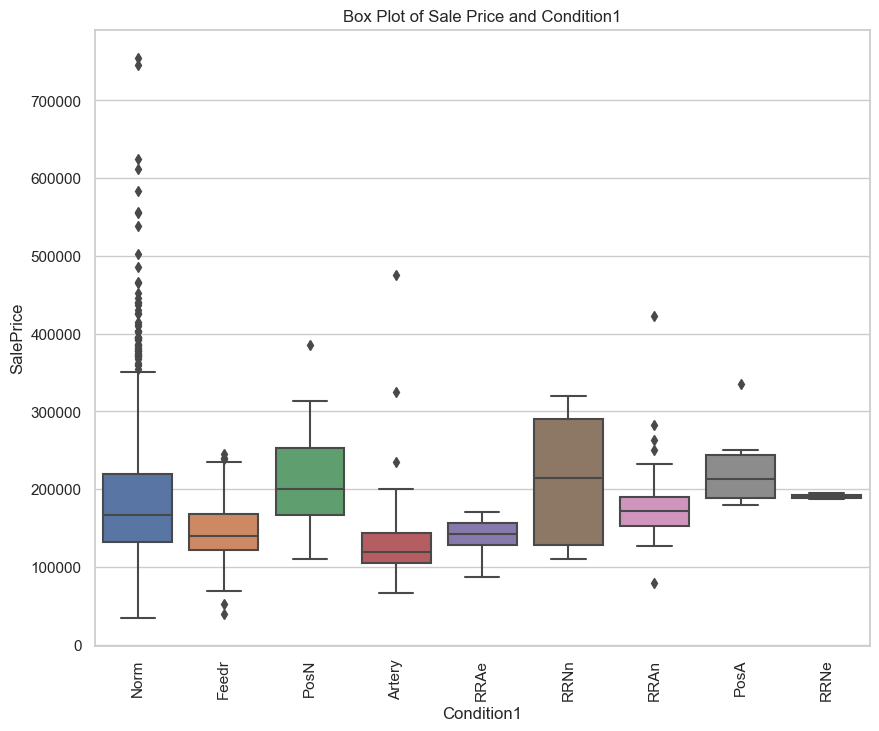

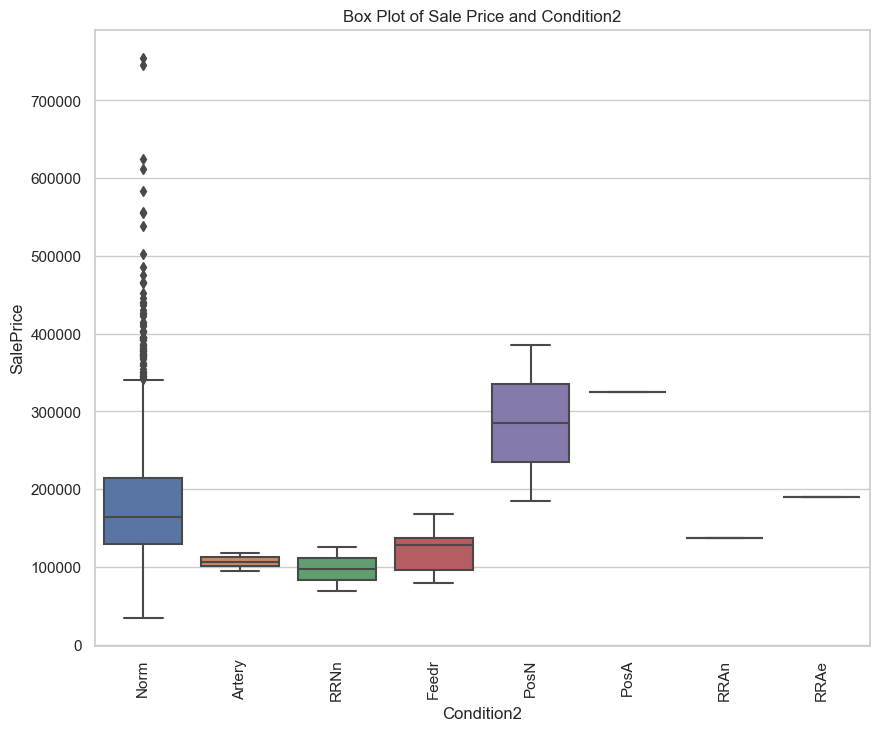

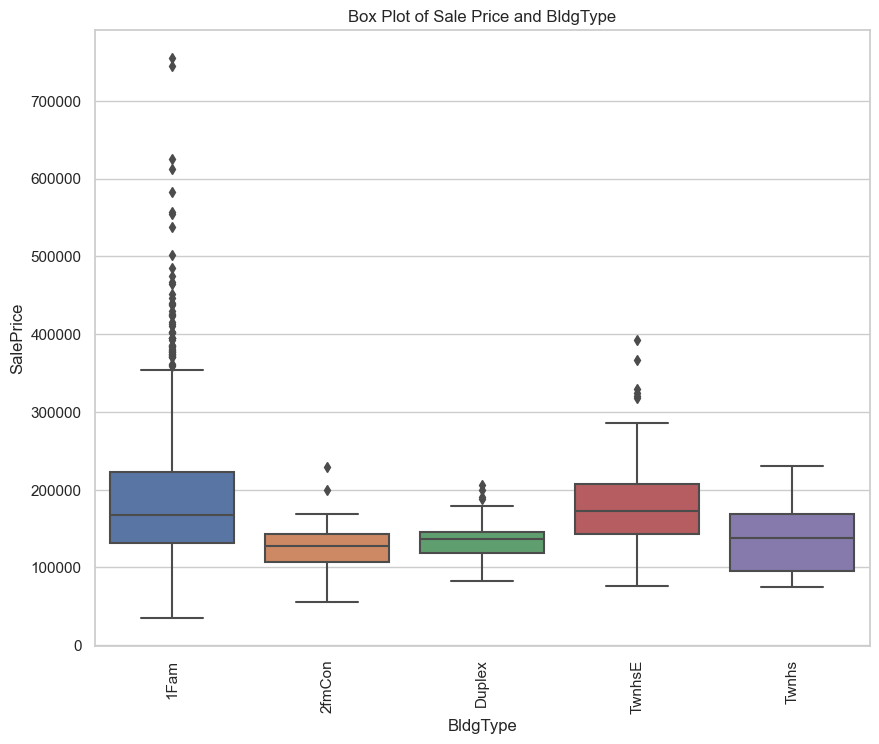

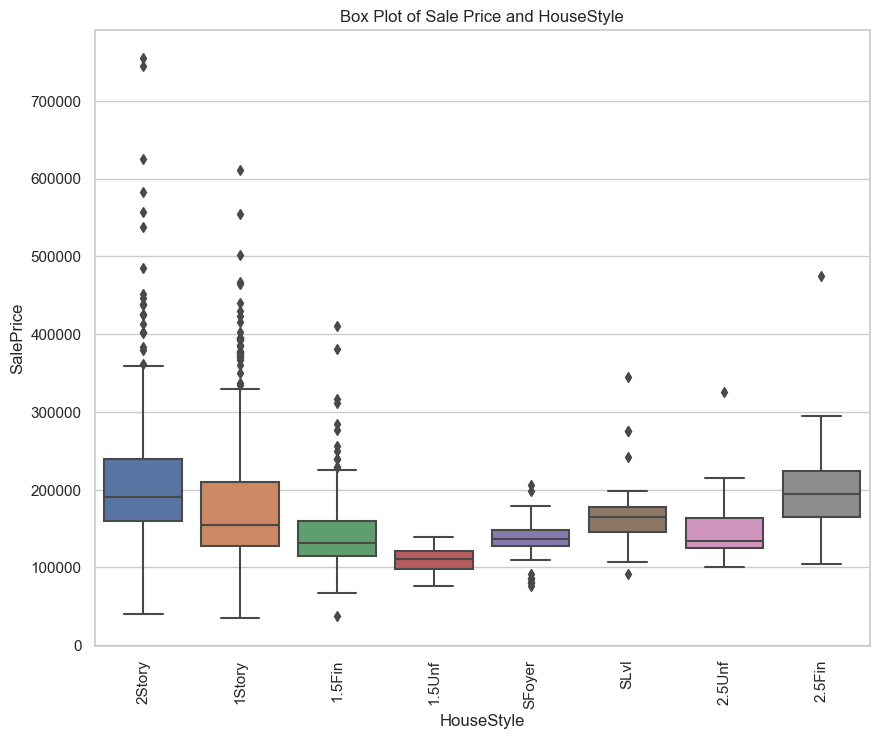

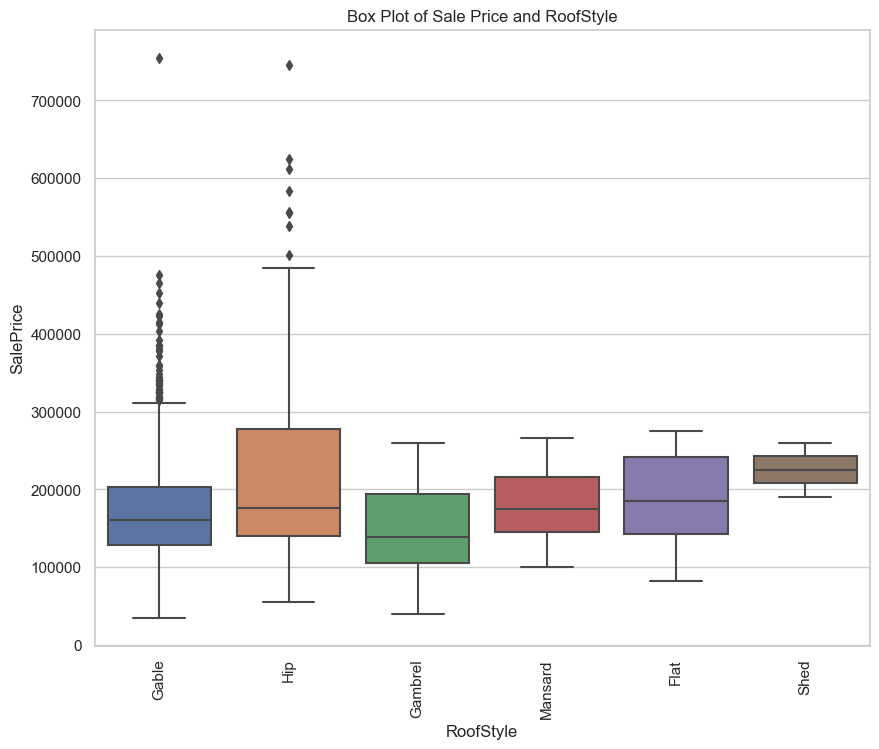

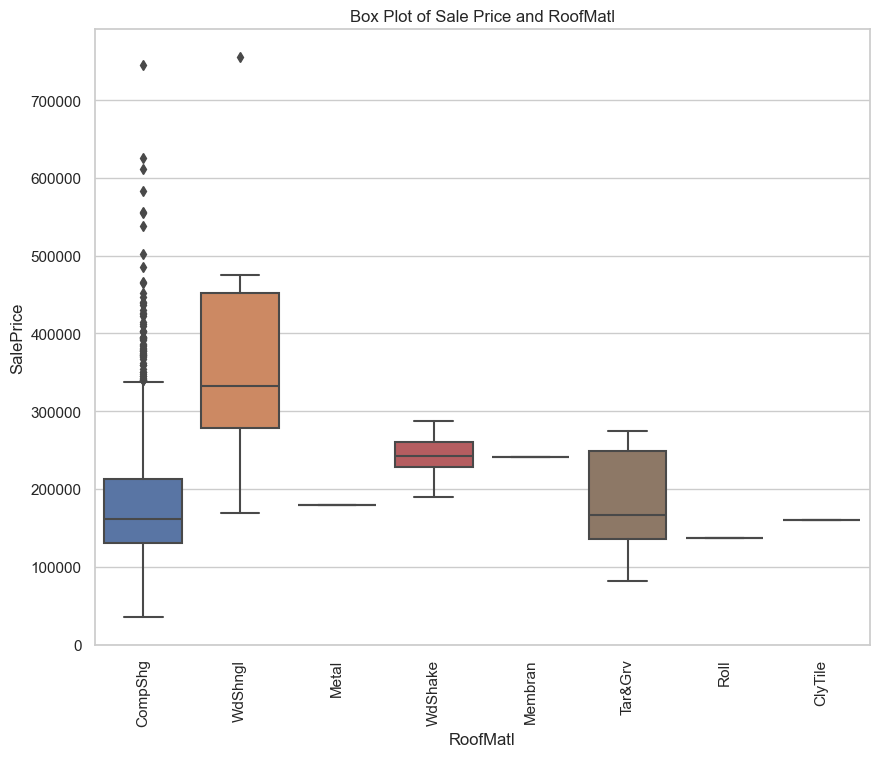

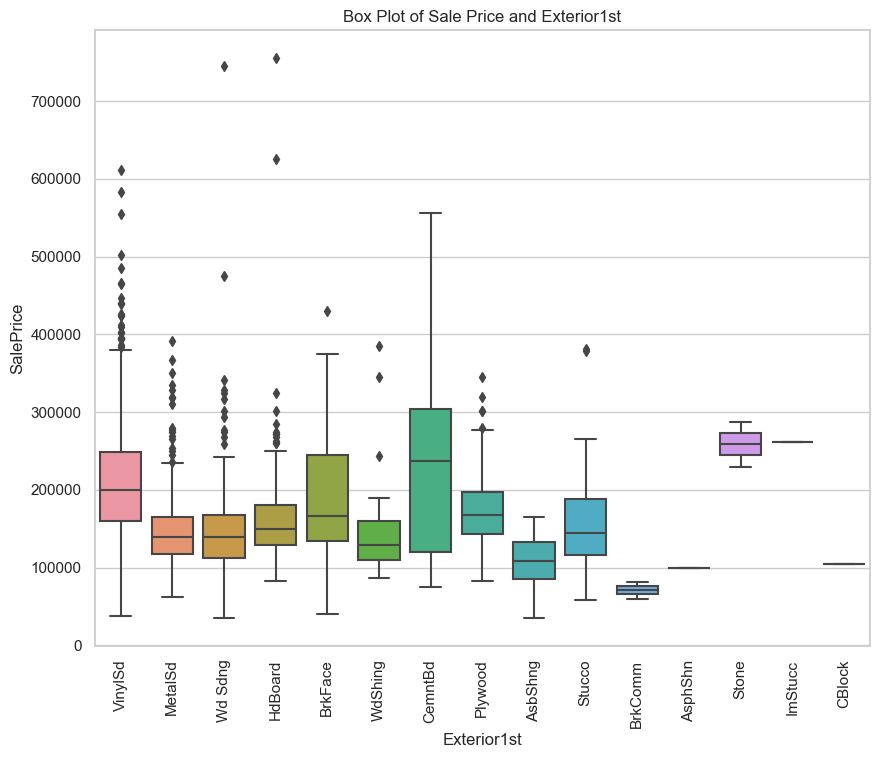

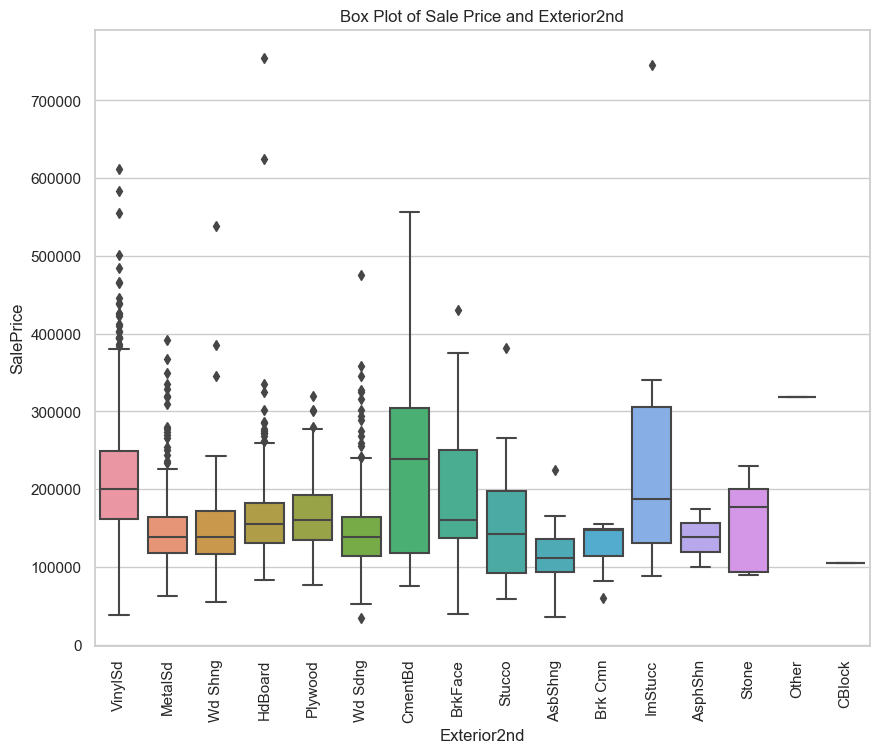

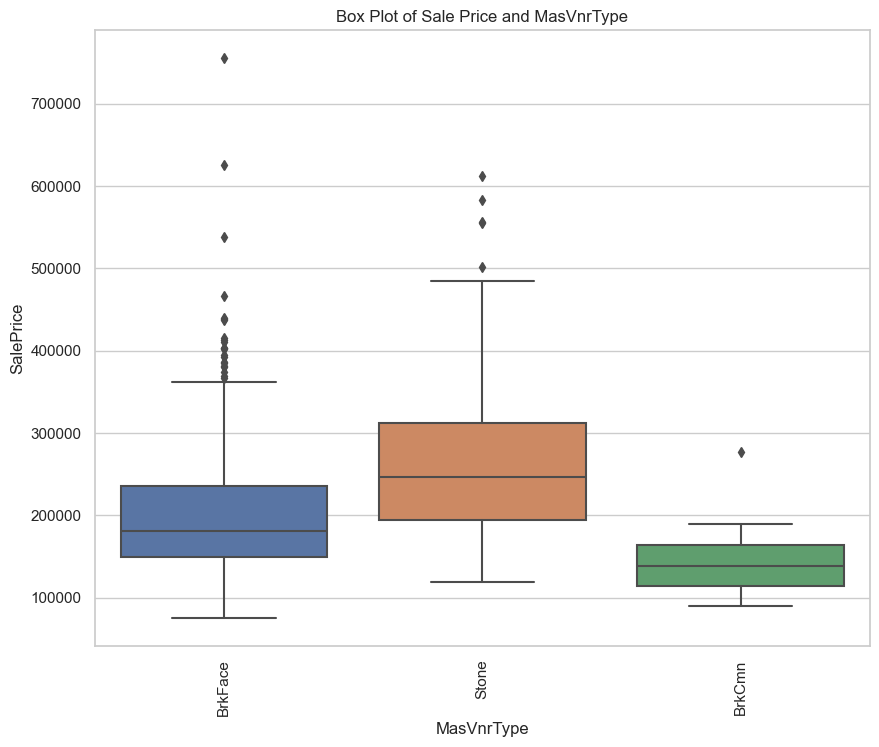

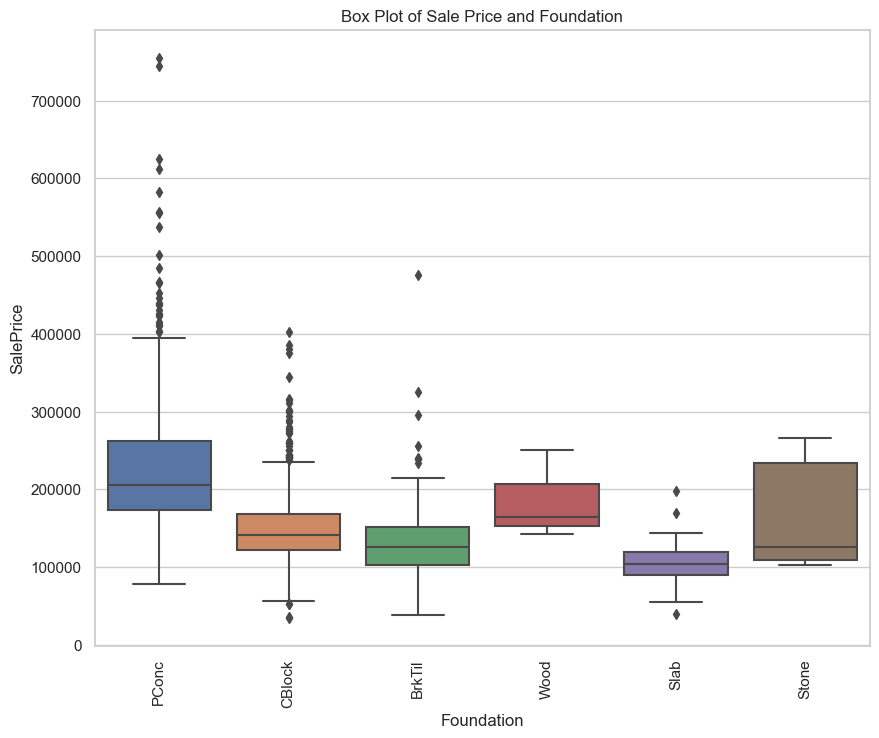

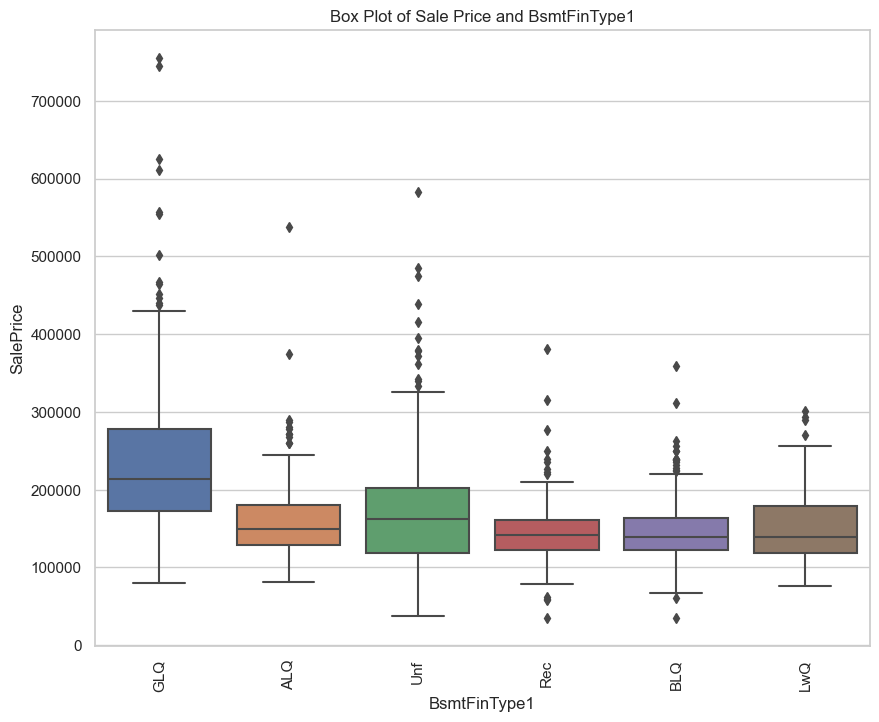

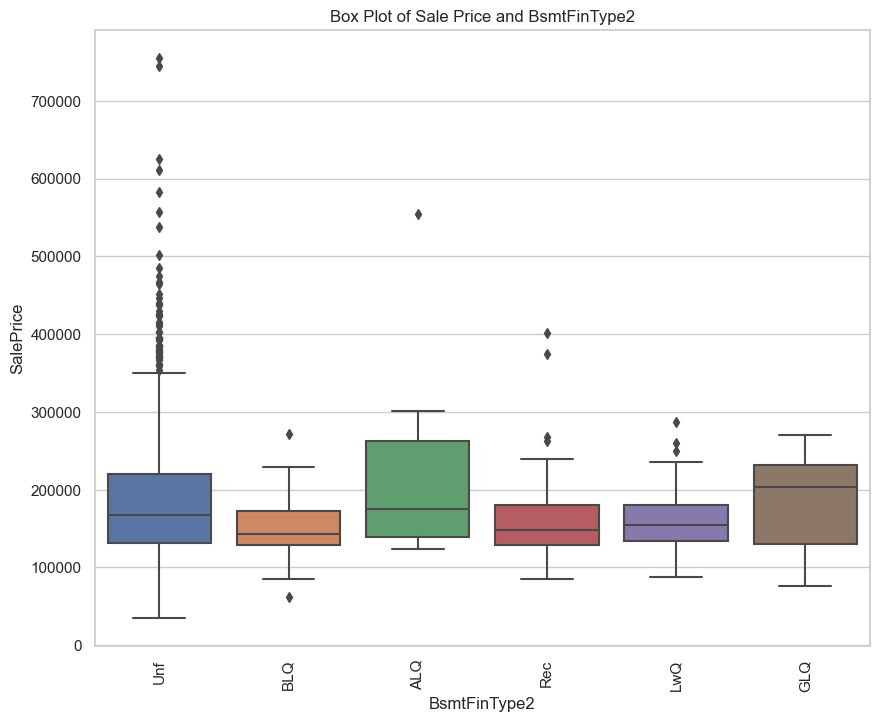

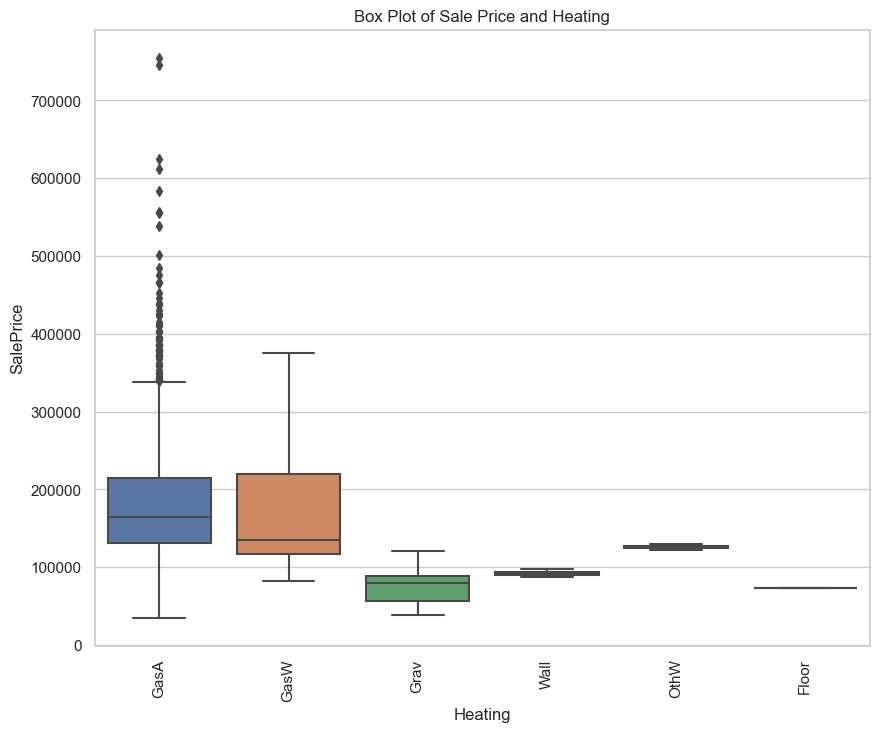

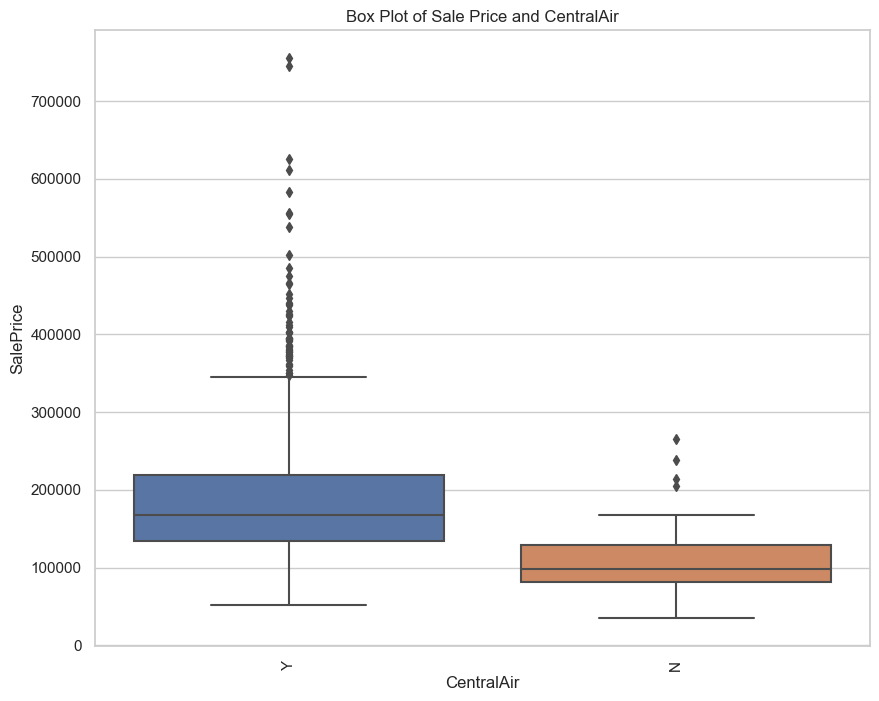

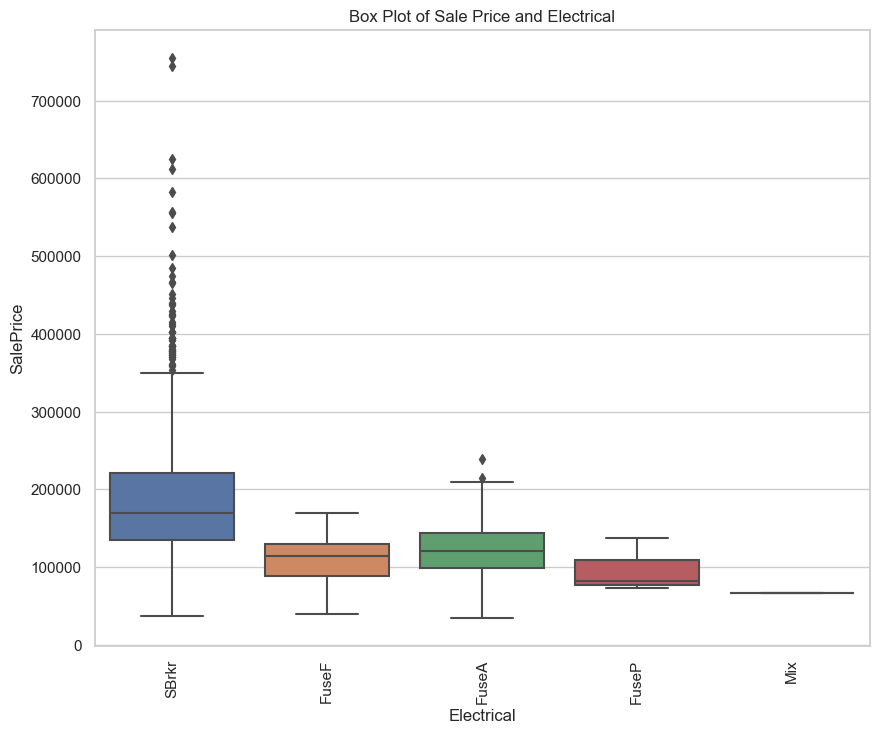

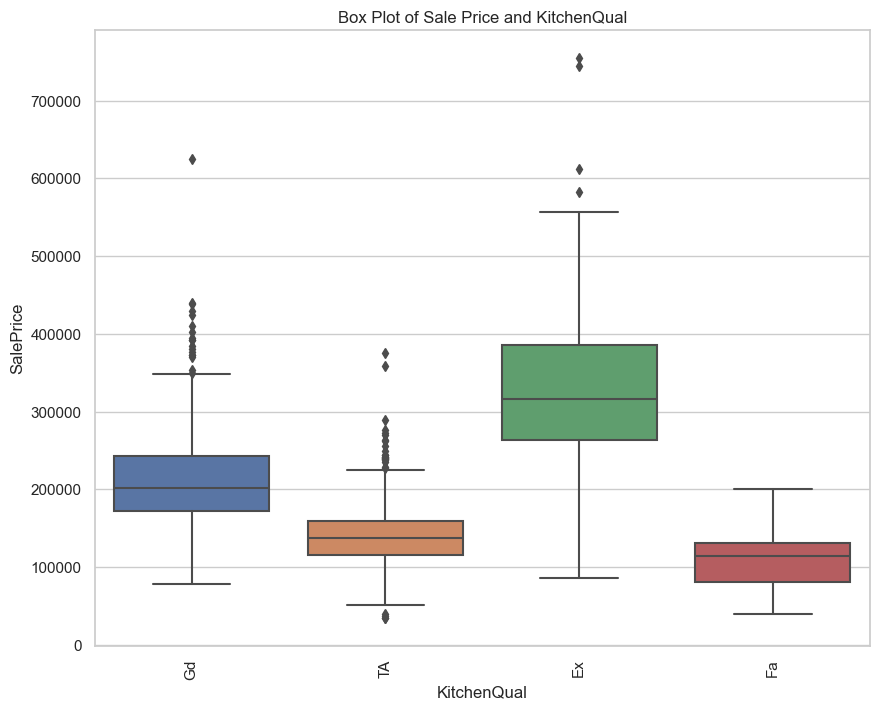

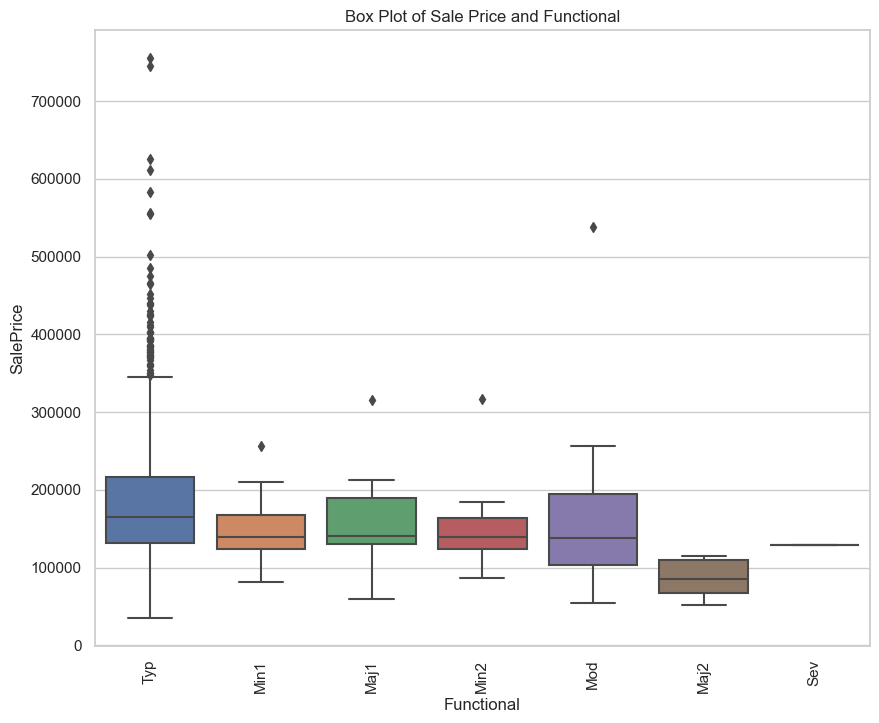

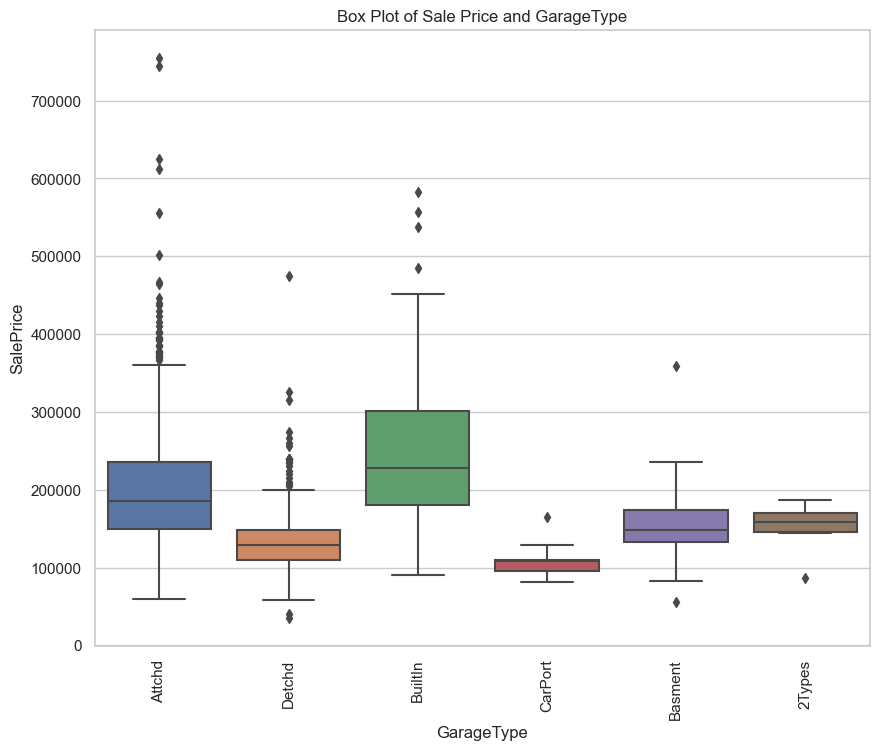

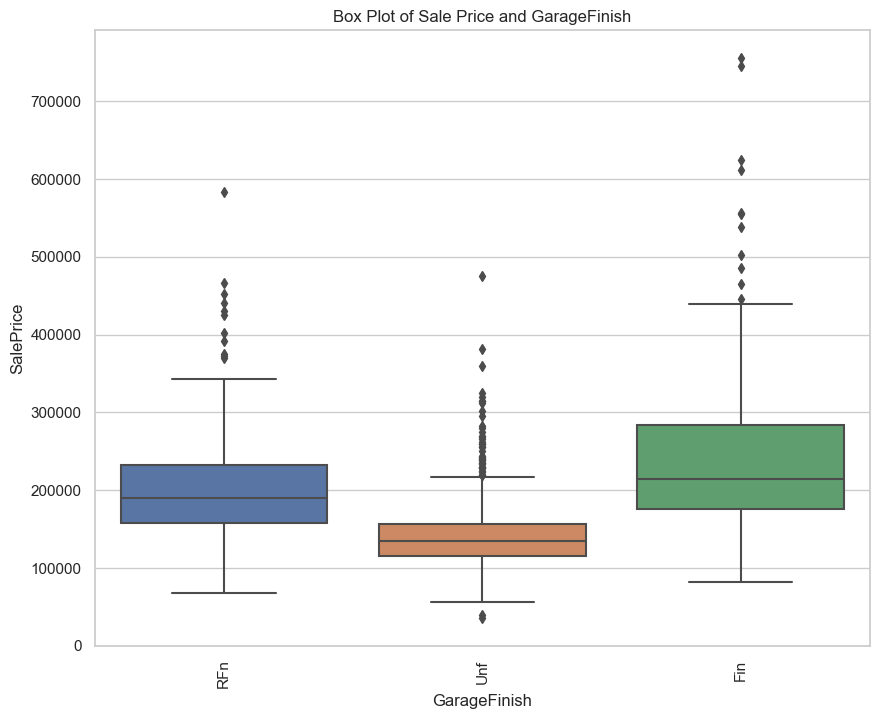

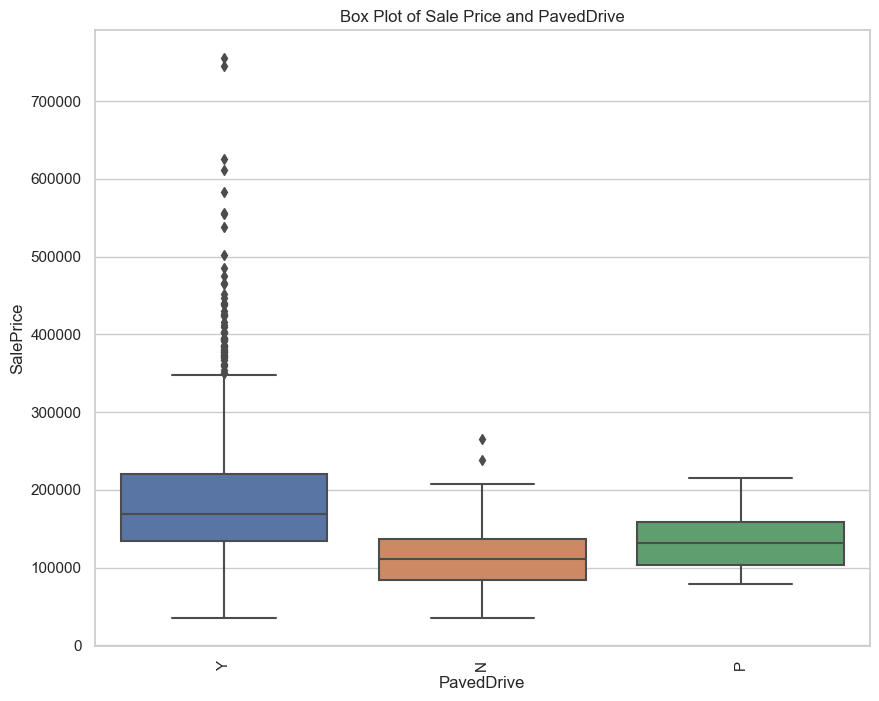

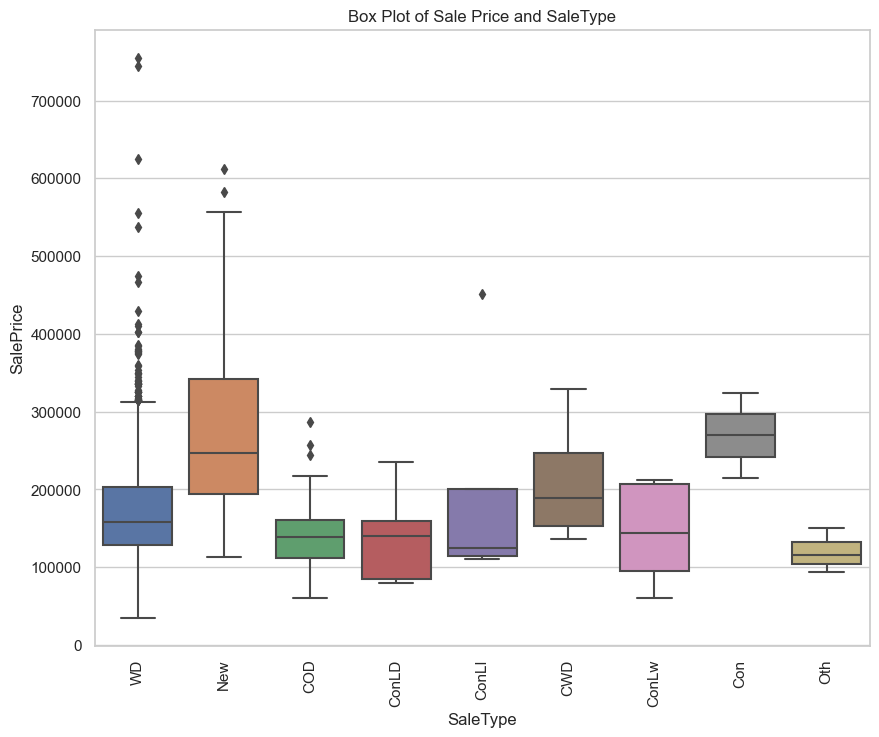

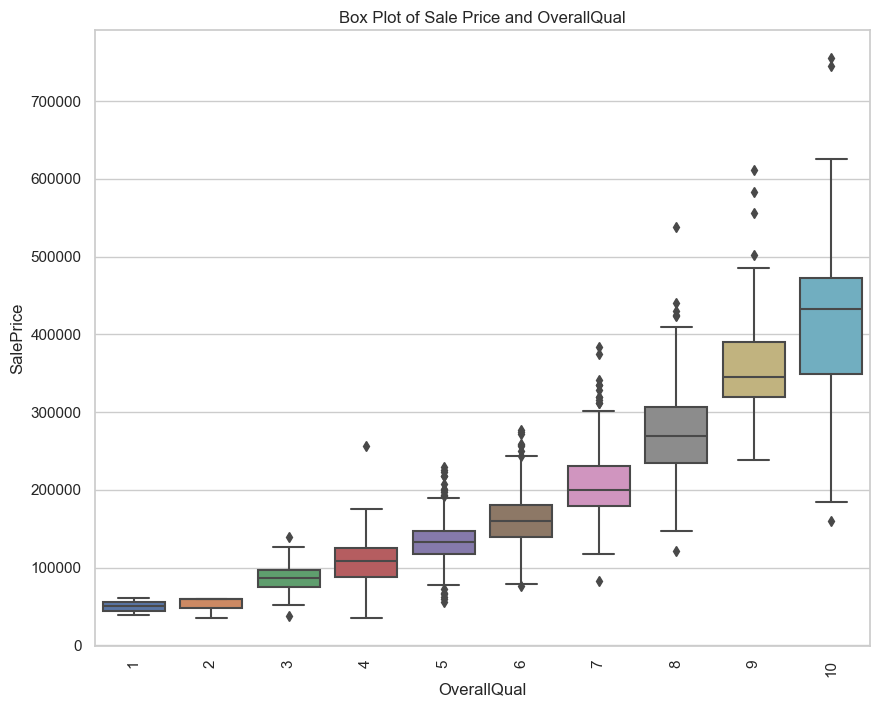

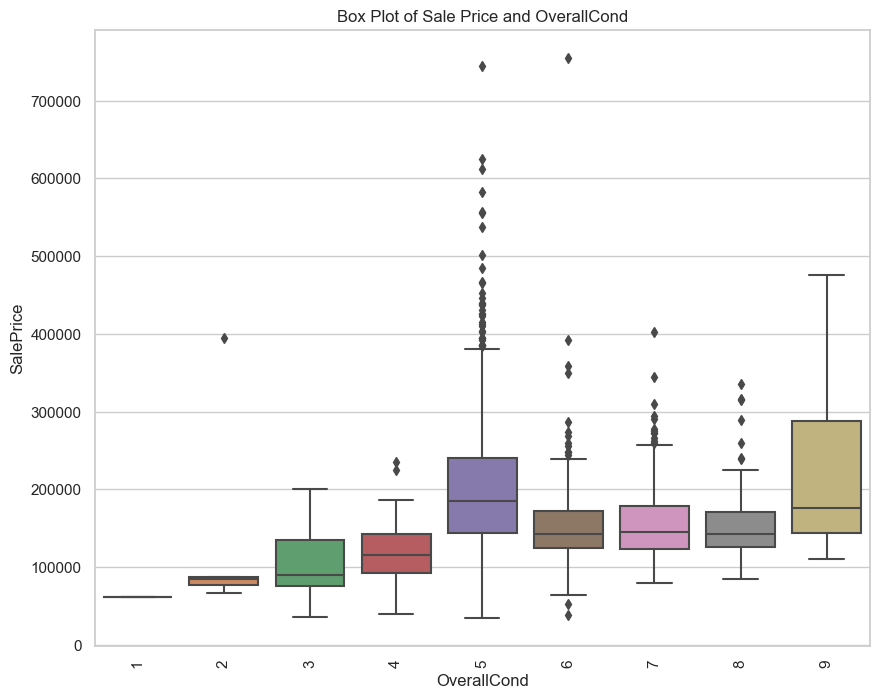

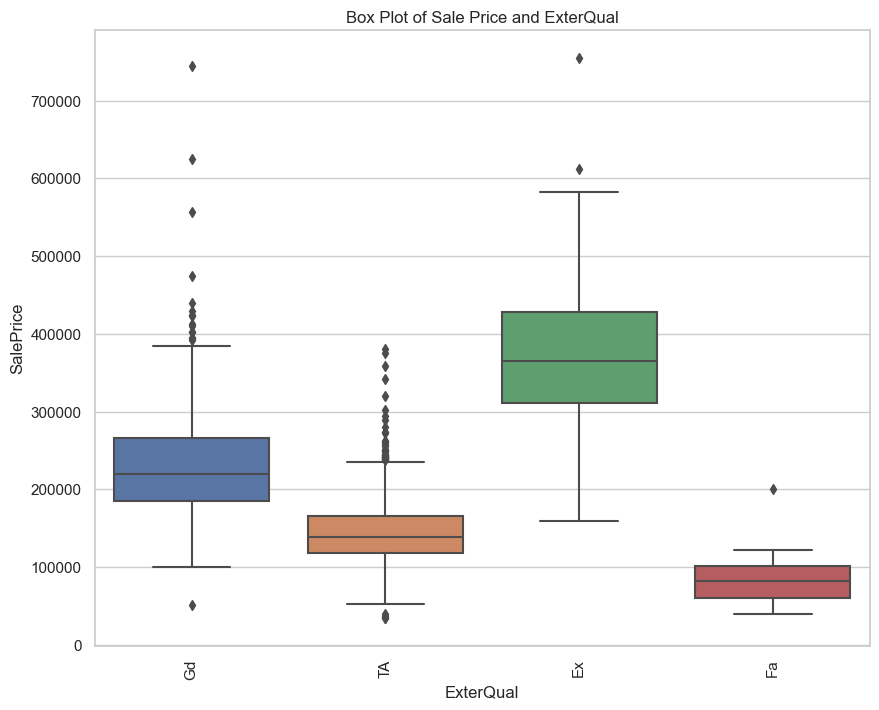

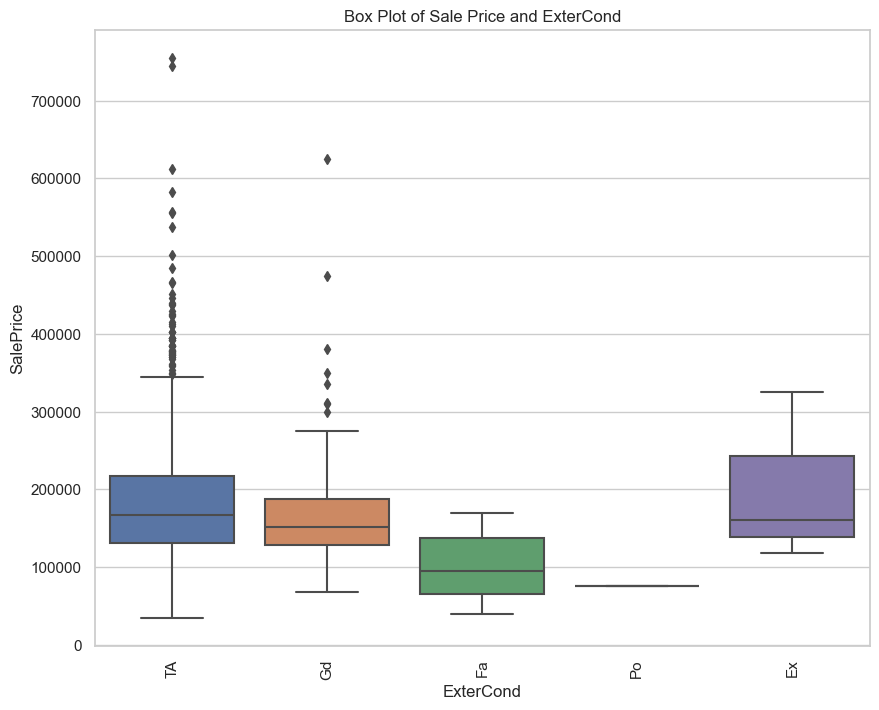

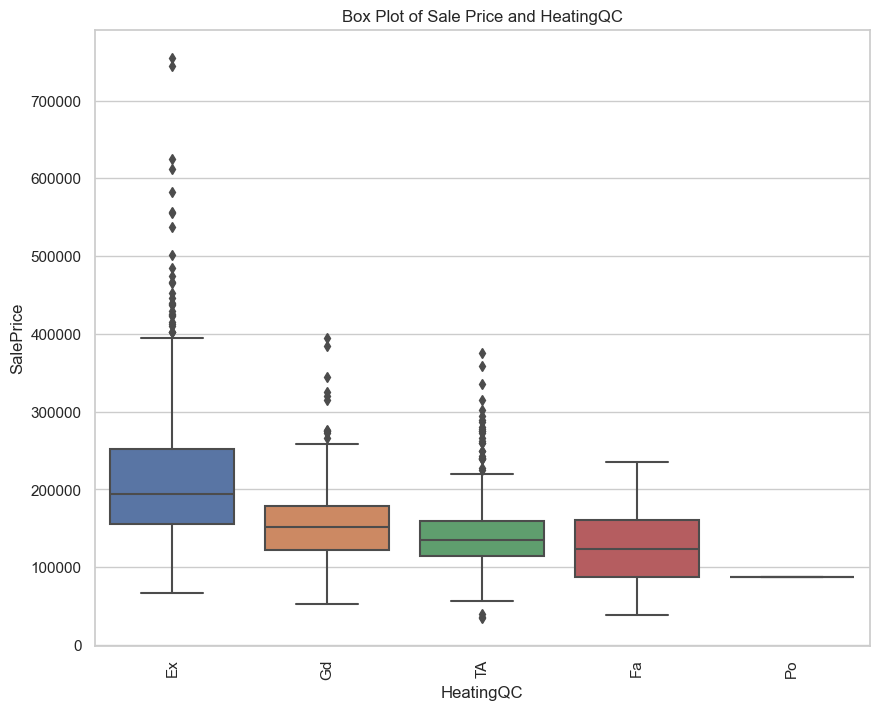

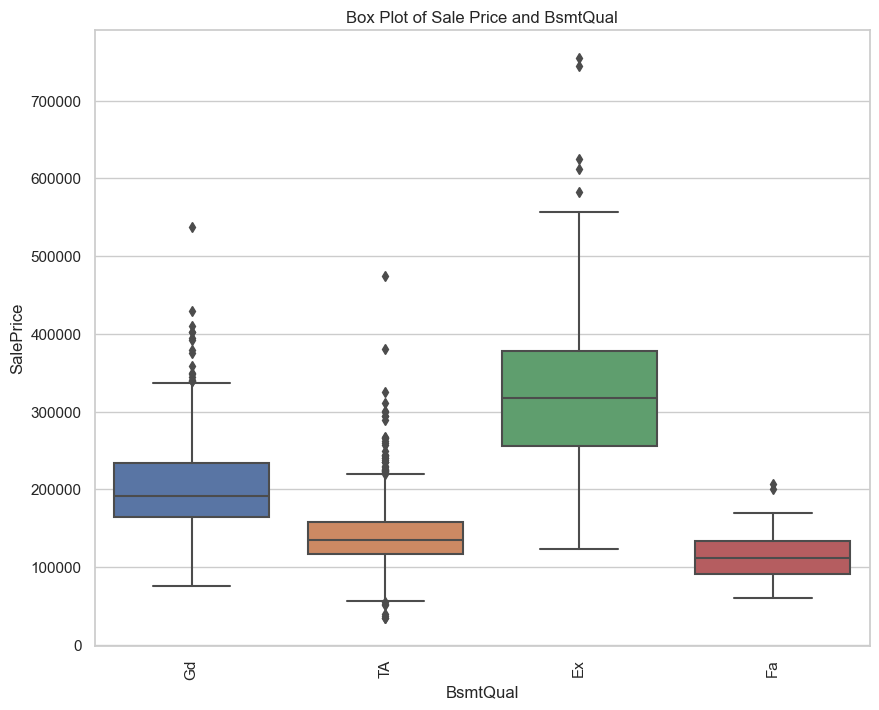

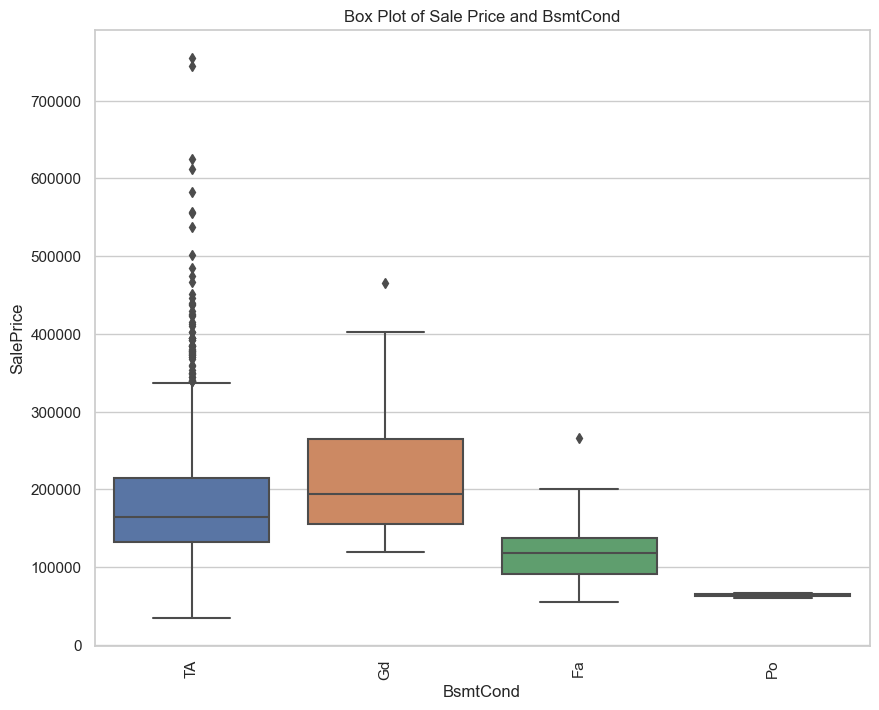

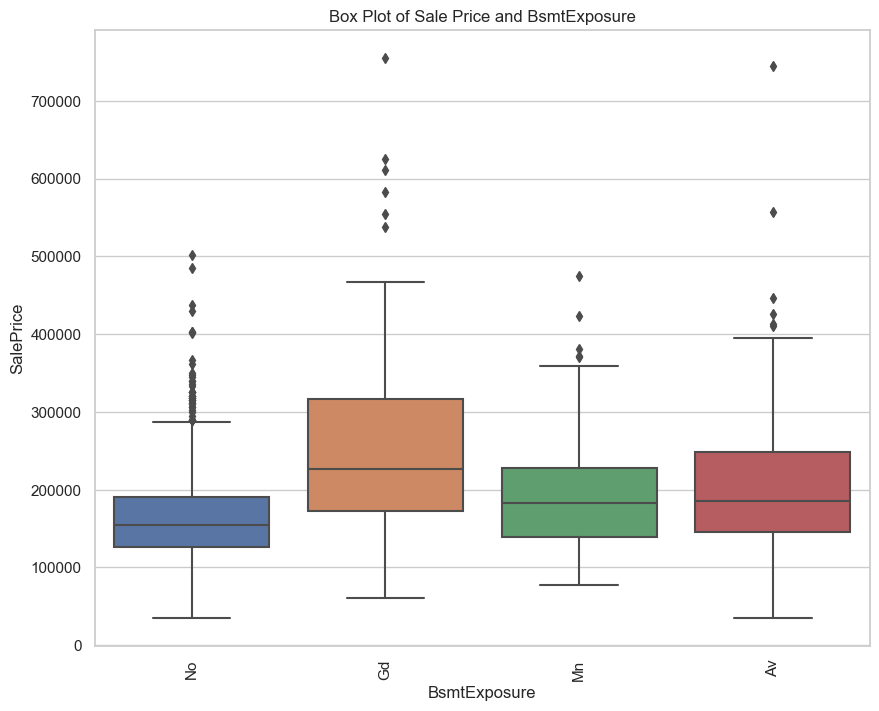

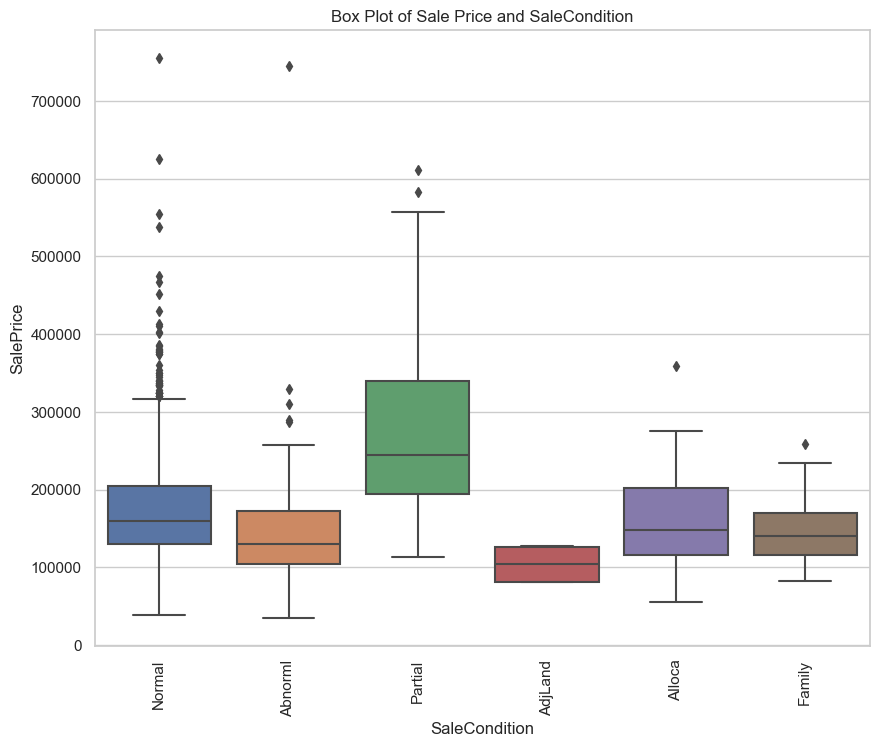

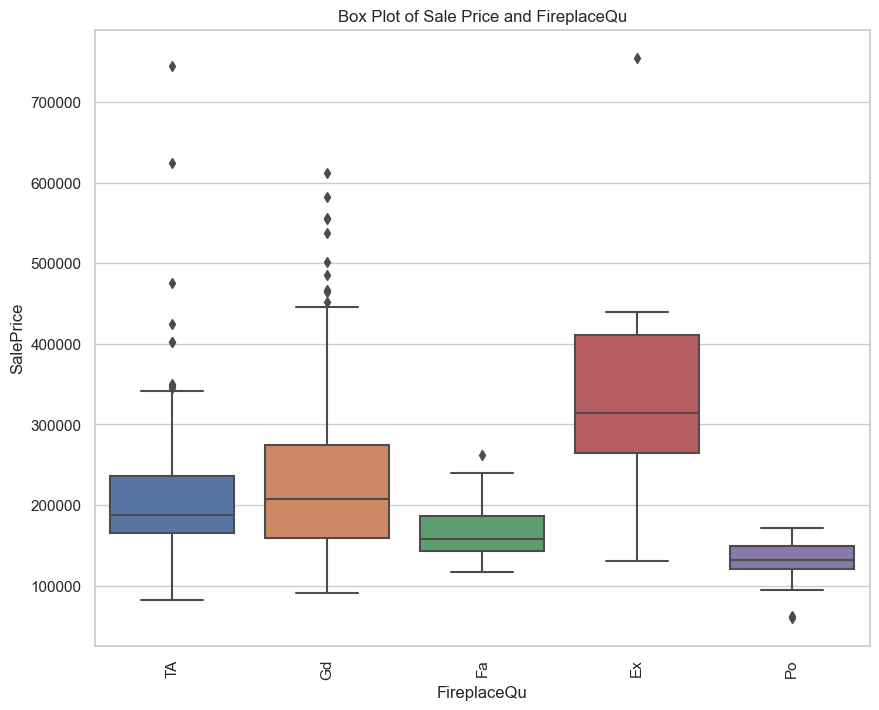

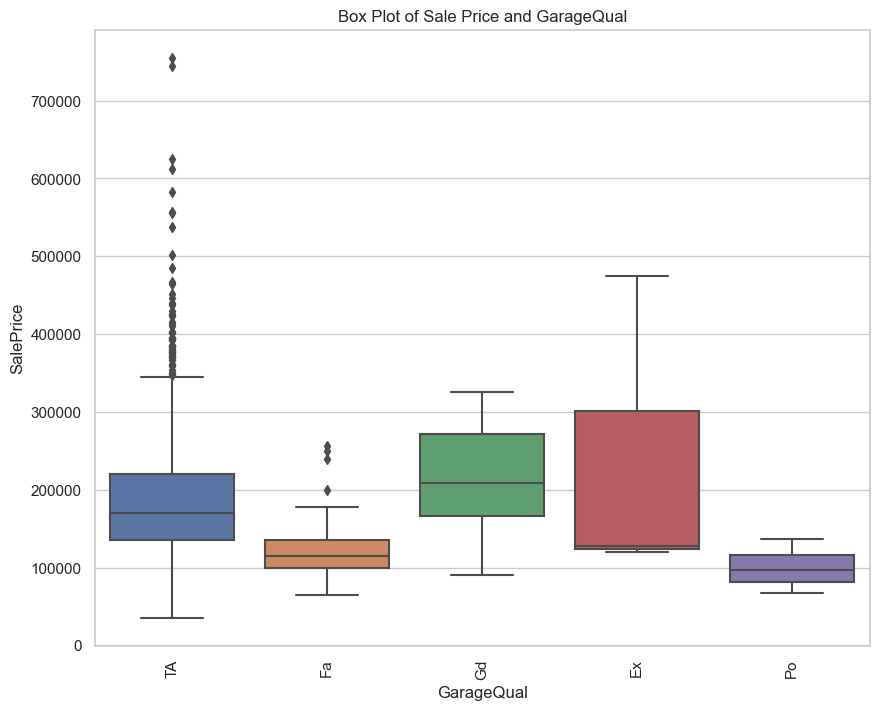

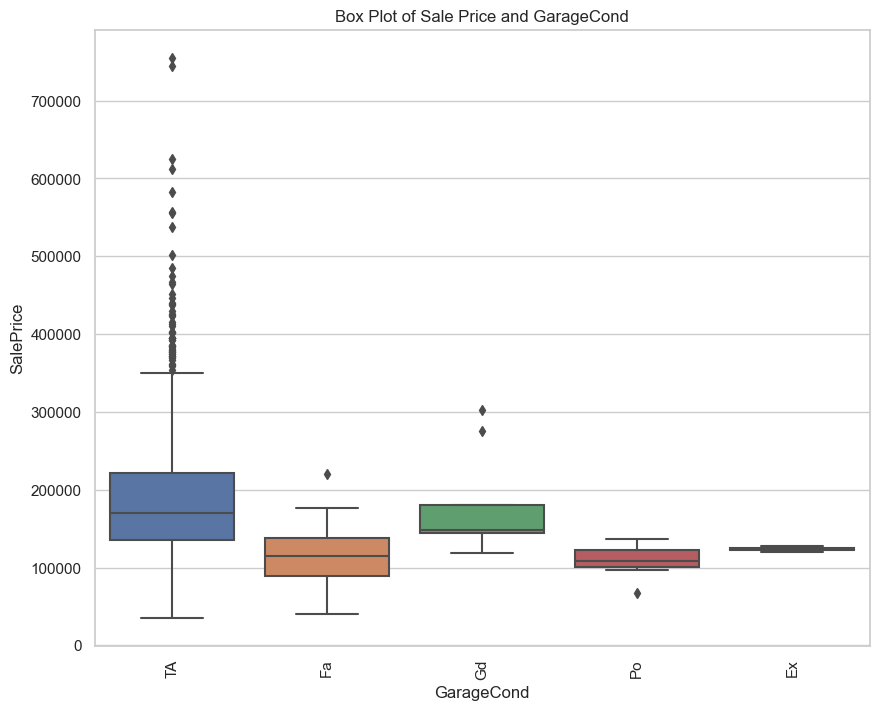

In [112]:
# To plot Box Plots for Categorical and Ordincal Variables 
for var in categorical_vars + ordinal_vars:
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=df, x=var, y='SalePrice')
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of Sale Price and {var}')
    plt.show()


## Data Preparation including feature engineering

### Data Cleaning
Upon conducting an initial assessment of the dataset using df.info(), it has been observed that there are null values present across several features. Hence, handling of missing data is required.

Handling Missing Data:

1) Dropping Columns with Excessive Missing Values:

- Alley, PoolQC, Fence, MiscFeature: These columns have more than 1000 missing records, given the dataset size of 1460 rows. They will be dropped due to the high percentage of missing data.

2) Imputing Missing Values for Categorical Variables:

- FireplaceQu, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual, GarageCond, MasVnrType: Impute missing values with "None" as it represents a valid category for the absence of these features.

3) Imputing Missing Values for Numerical Variables:
- MasVnrArea: Impute missing values with the median to avoid the influence of outliers.
- Electrical: Impute missing values with the mode to represent the most common electrical system type.
- LotFrontage: Impute missing values with the median to preserve the central tendency without being influenced by outliers.
- GarageYrBlt: Impute missing values with the median year built to avoid the influence of outliers and provide a central tendency for the year built of the garages.



The dataset also shows several outliers across various features, particularly in those describing property size and cost. However, in the context of real estate pricing, these outliers represent high-value property transactions, which are realistic and relevant for our analysis. Removing them might lead to data bias, and the decision has been made to not remove these outliers.


In [114]:
# Columns to be removed
columns_to_remove = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

# Drop features with a high percentage of missing values
df.drop(columns=columns_to_remove, inplace=True)

features_names = [feature for feature in features_names if feature not in columns_to_remove]
continuous_vars = [feature for feature in continuous_vars if feature not in columns_to_remove]
categorical_vars = [feature for feature in categorical_vars if feature not in columns_to_remove]
ordinal_vars = [feature for feature in ordinal_vars if feature not in columns_to_remove]

# Numerical columns
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)


# Categorical columns with 'None' or 'NA'
none_fill_columns = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                     'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType']

for col in none_fill_columns:
    df[col].fillna('None', inplace=True)
    
# Numerical columns with mode
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

# Verify that there are no more missing values
print("Missing values after imputation:")
print(df.isnull().sum().sum())


Missing values after imputation:
0


### Transformation
There are several continuous variables exhibit skewed distributions that could benefit from transformations to reduce skewness and improve model accuracy. For instance:

- `LotFrontage`: Shows significant right skewness with a long tail of high values. Applying a log transformation can help normalize this feature.

- `GrLivArea` and `GarageArea`: Both display right skewness. Log transformations or square root transformations could be effective here to reduce skewness and stabilize variance.

These transformations will aid in normalizing the data distributions, which is crucial for many linear-based machine learning models that assume data normality.

Skewness before transformation:
LotFrontage: 2.4091466665496006
GrLivArea: 1.3665603560164552
GarageArea: 0.17998090674623907

Skewness after transformation:
Log_LotFrontage: -0.870005697584457
Log_GrLivArea: -0.006140253486287281
Log_GarageArea: -3.482604188040364


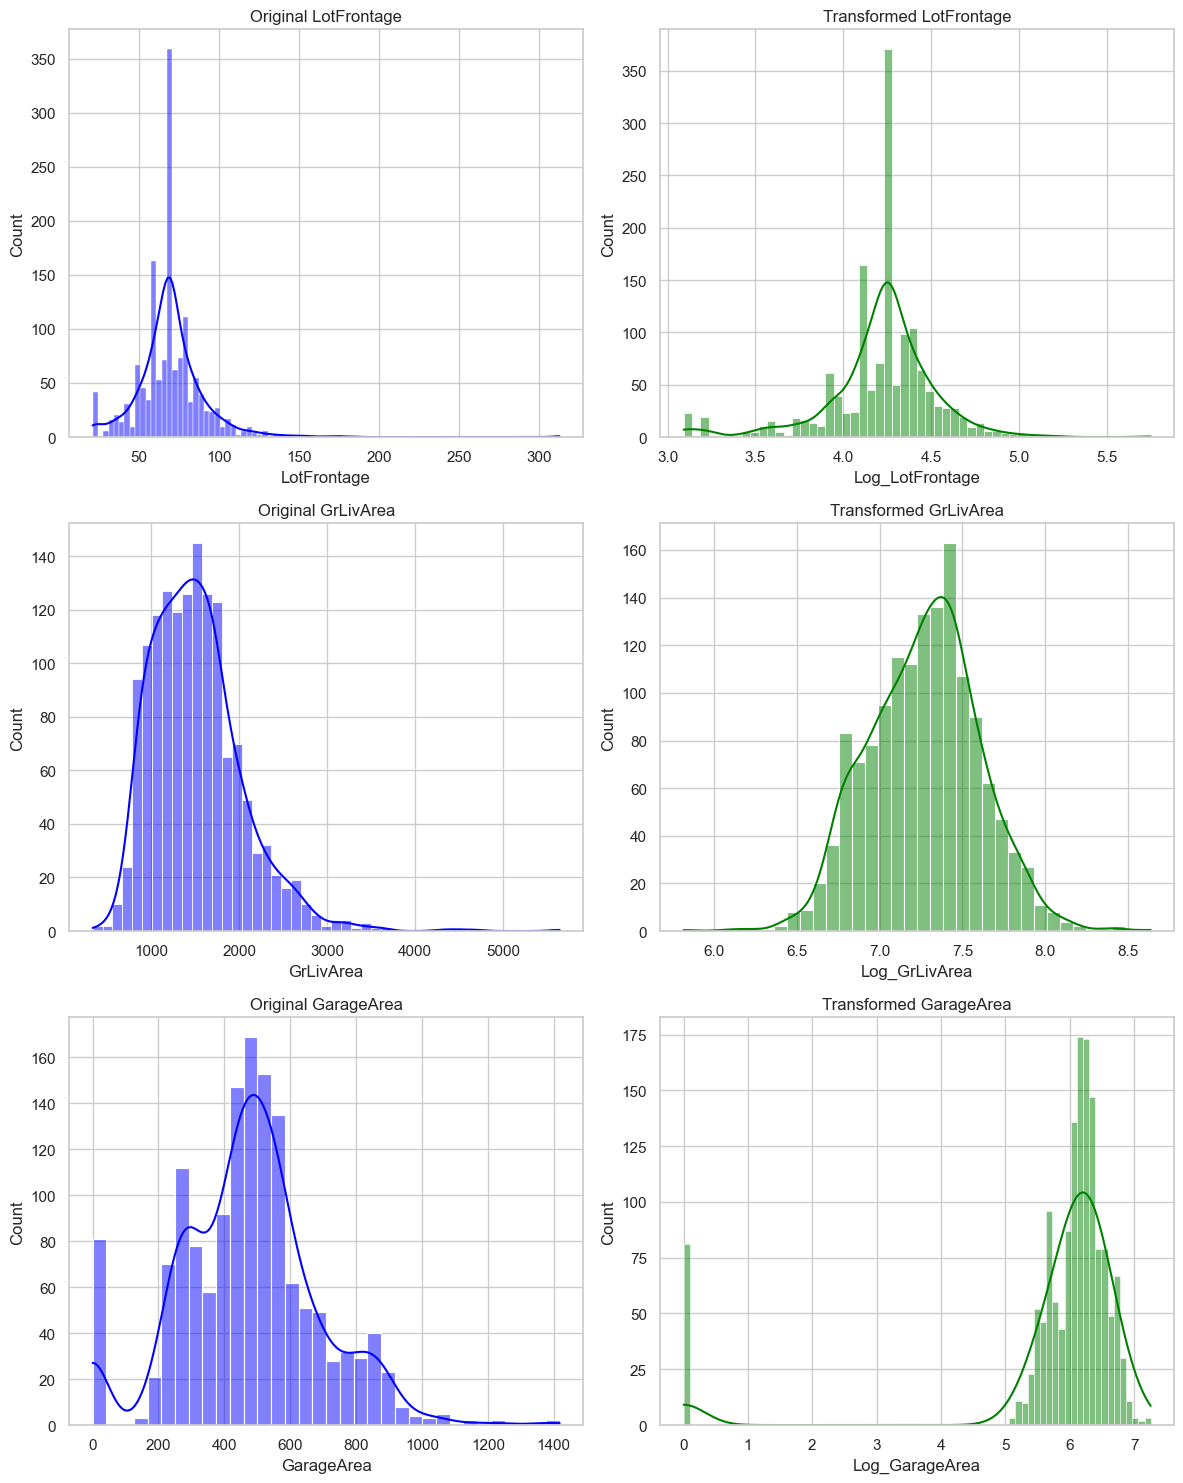

In [116]:
# Creating new columns for the log-transformed data
df['Log_LotFrontage'] = np.log1p(df['LotFrontage'])
df['Log_GrLivArea'] = np.log1p(df['GrLivArea'])
df['Log_GarageArea'] = np.log1p(df['GarageArea'])

# Checking the skewness before and after transformation
print("Skewness before transformation:")
print("LotFrontage:", df['LotFrontage'].skew())
print("GrLivArea:", df['GrLivArea'].skew())
print("GarageArea:", df['GarageArea'].skew())

print("\nSkewness after transformation:")
print("Log_LotFrontage:", df['Log_LotFrontage'].skew())
print("Log_GrLivArea:", df['Log_GrLivArea'].skew())
print("Log_GarageArea:", df['Log_GarageArea'].skew())

# Visualizing the effects of the transformations
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Original distributions
sns.histplot(df['LotFrontage'].dropna(), kde=True, ax=axes[0, 0], color='blue').set_title('Original LotFrontage')
sns.histplot(df['GrLivArea'].dropna(), kde=True, ax=axes[1, 0], color='blue').set_title('Original GrLivArea')
sns.histplot(df['GarageArea'].dropna(), kde=True, ax=axes[2, 0], color='blue').set_title('Original GarageArea')

# Transformed distributions
sns.histplot(df['Log_LotFrontage'].dropna(), kde=True, ax=axes[0, 1], color='green').set_title('Transformed LotFrontage')
sns.histplot(df['Log_GrLivArea'].dropna(), kde=True, ax=axes[1, 1], color='green').set_title('Transformed GrLivArea')
sns.histplot(df['Log_GarageArea'].dropna(), kde=True, ax=axes[2, 1], color='green').set_title('Transformed GarageArea')

plt.tight_layout()
plt.show()


As observed, not all transformations necessarily yield better results. For `GarageArea`, a significant number of properties do not have a garage, reflected as zeros in our data. This characteristic is crucial for maintaining a realistic representation of our dataset.

The initial transformation applied to `GarageArea` resulted in an over-correction, evidenced by an increase in negative skewness from a previously minimal skew. This indicates that the transformation might not be appropriate for this feature. Given the importance of including properties without garages and the minimal original skewness, we will retain the original distribution of `GarageArea` in our analyses.

### Feature Engineering 
From the given data set, not all provided features are equally useful in their original and require us to enhance through feature engeering or to ignore certain fields. Some examples are:

- `TotalBsmtSF`: Instead of using `BsmtFinSF1`, `BsmtFinSF2`, and `BsmtUnfSF` separately, which show varying levels of skew and granularity, TotalBsmtSF will be used as it offers a consolidated view of the basement area and is more normally distributed.

- `TotalFlrSF`: Combining `1stFlrSF` and `2ndFlrSF` into a new feature `TotalFlrSF` can provide a holistic view of the total living area, excluding the basement. This aggregation may provide a more direct correlation with SalePrice than considering the floors separately.

Based on the given data, some features are not very useful as it is and it would be better to combine or to derive a clearer information through feature engineering.


Before we decide to use Total Bsmt, we should do a check to see if there are desprepancies

In [118]:
# Calculate a temporary 'TotalBsmtSF_check' to verify the sum
df['TotalBsmtSF_check'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF']

discrepancy = df['TotalBsmtSF'] != df['TotalBsmtSF_check']
if discrepancy.any():
    print(f"Discrepancies found in {discrepancy.sum()} rows")
else:
    print("No discrepancies found, the columns are aligned.")

# Create a new feature for total square footage of the first and second floors
df['TotalFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']

No discrepancies found, the columns are aligned.


In [120]:
#Drop the unnecessary columns from df and features varialbes
columns_to_remove = ['TotalBsmtSF_check','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF']

df.drop(columns_to_remove, axis=1, inplace=True)

features_names = [feature for feature in features_names if feature not in columns_to_remove]
continuous_vars = [feature for feature in continuous_vars if feature not in columns_to_remove]
categorical_vars = [feature for feature in categorical_vars if feature not in columns_to_remove]
ordinal_vars = [feature for feature in ordinal_vars if feature not in columns_to_remove]

### Encoding


Next, we will have to encode the categorical variables and manually map the ordinal variables to numeric values based on the provided data dictionary. 

#### Ordinal Mappings
For ordinal variables, we see that `OverallCond` and `OverallQual` are already in numeric ordering so no mapping is required. 

In [122]:
# Ordinal mappings (only for those that need specific mapping)
ordinal_mappings = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'SaleCondition': {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6}
}


# Apply ordinal encoding to relevant columns
for var in ordinal_vars:
    if var in ordinal_mappings:
        df[var] = df[var].map(ordinal_mappings[var])


#### One-Hot Encoding for Categorical Variables
For the categorical variables, we will use one-hot encoding to transform these variables into a format suitable for machine learning models.

In [124]:
# One-Hot Encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
    ],
    remainder='passthrough'  # Ensures other columns are not dropped
)

# Fit and transform the data
df_encoded = preprocessor.fit_transform(df)

# Retrieve the feature names after encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_vars)

# Get the rest of the feature names that were passed through
remaining_feature_names = [col for col in df.columns if col not in categorical_vars]

# Combine encoded feature names with remaining feature names
all_feature_names = list(encoded_feature_names) + remaining_feature_names

df_encoded_dense = df_encoded.toarray()
df_final = pd.DataFrame(df_encoded_dense, columns=all_feature_names)



### Feature Selection

Now that we have completed all the transformations and encoding, we will select the important features based on their correlation with the target and other factors, before proceed with model training.

Correlation with the target variable:
SalePrice            1.000000
OverallQual          0.790982
TotalFlrSF           0.716883
GrLivArea            0.708624
Log_GrLivArea        0.695147
                       ...   
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
MasVnrType_None     -0.367456
GarageFinish_Unf    -0.410608
KitchenQual_TA      -0.519298
Name: SalePrice, Length: 257, dtype: float64


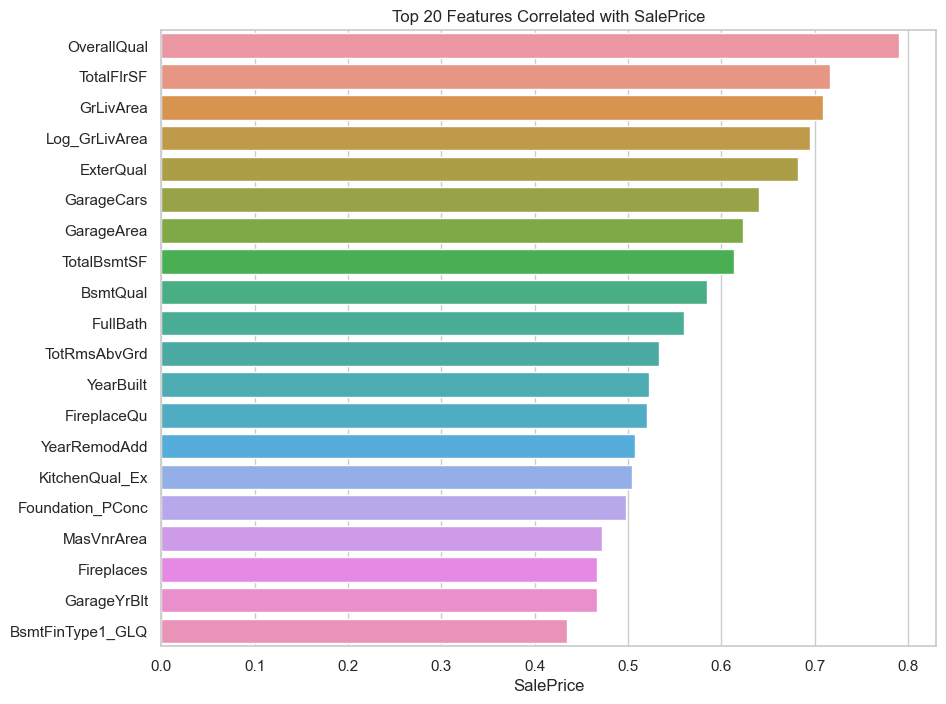

In [127]:
# Assuming 'SalePrice' is the target variable
target = 'SalePrice'

# Compute the correlation matrix with the target variable
corr_with_target = df_final.corr()[target].sort_values(ascending=False)

# Print the correlation with the target variable
print("Correlation with the target variable:")
print(corr_with_target)

top_features = corr_with_target.index[1:21]  # Exclude the target itself
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target[top_features], y=top_features)
plt.title('Top 20 Features Correlated with SalePrice')
plt.show()

The plot above shows the top 20 features correlated with SalePrice. However, having a higher correlation does not necessarily mean a feature is the best candidate, as highly negatively correlated features are also important. We also need to check for high correlations between features and consider statistical significance, such as the T-Score. Therefore, we will use the RandomForestRegressor model to select the most important features for machine learning later.

#### Feature Selection Using Random Forest

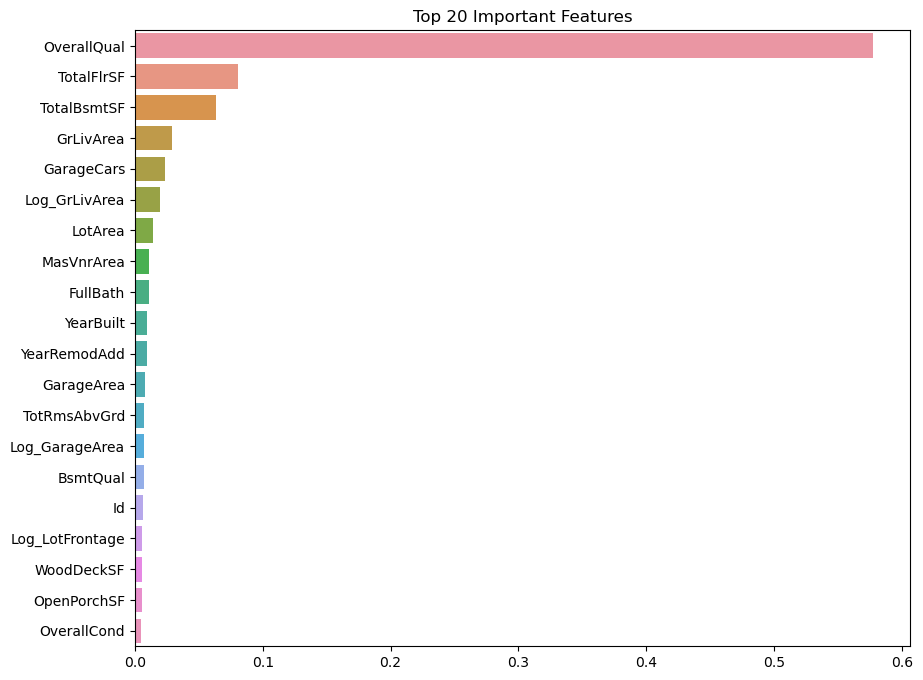

In [35]:
# Feature selection using Random Forest to assess feature importance
X = df_final.drop(columns=[target])
y = df_final[target]

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[:20], y=feature_importances.index[:20])
plt.title('Top 20 Important Features')
plt.show()

# Select the top features based on importance 
selected_features = feature_importances[feature_importances > 0.01].index  


df_reduced = df_final[selected_features]
df_reduced[target] = y

In the feature importance selection step, we set a threshold (e.g., 0.01) to filter out features that contribute very little to the model. This threshold is adjustable based on the specific requirements and the nature of the dataset. The selected features are those that have an importance score above this threshold. This ensures that only the most relevant features are included in the final model training, improving model performance and interpretability.

## Model Selection 

After selecting the features, we will now proceed with training models and evaluating their performance. Based on problem and data, the following four regression models were chosen to predict the sales price:

1) Linear Regression
- Simplicity and Baseline: Linear Regression is straightforward and serves as a bench mark to gauge the perdormance of more complex models. I alslo provides clear insightws into the relationships between features and the target variable. 

2) Decision Tree Regressor
- Decision Trees can model non-linear relationships, which are common in real estate data. The model can also naturally rank feature importanece offerings into the most influential variables for house pricing

3) Random Forest Regressor
- Based on research, it is robust to overfitting, especially in high-dimensional spaces,m by average multiple trees prediction. It also provides stable and reliable estimates of feature importance, which helps in undertanding the driving factors behind house prices.

4) Gradient Boosting Regressor
- Based on research, Gradient Boosting builds model sequentially and each new model correcting errors made by the previous ones which enhance overall accurancy. It also often outperforms other models by focusing on the most challenging cases. 

In [40]:
# Prepare the data
X = df_reduced.drop(columns=[target])
y = df_reduced[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} CV Mean Squared Error: {-cv_scores.mean()}")

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}



Linear Regression CV Mean Squared Error: 1627046071.358434
Decision Tree CV Mean Squared Error: 2469922340.632541
Random Forest CV Mean Squared Error: 1236614524.188518
Gradient Boosting CV Mean Squared Error: 1248021823.2154717


## Performance Measurement 

In [129]:
mean_price = y.describe()['mean']

# Loop through models to calculate percentages and print results
for name, metrics in models.items():
    mae = results[name]['MAE']
    mse = results[name]['MSE']
    rmse = np.sqrt(mse)
    r2 = results[name]['R2']
    
    mae_percentage = (mae / mean_price) * 100
    rmse_percentage = (rmse / mean_price) * 100
    
    print(f"{name} - Mean Absolute Error (MAE): ${mae:.2f} ({mae_percentage:.2f}% of mean house price)")
    print(f"{name} - Root Mean Squared Error (RMSE): ${rmse:.2f} ({rmse_percentage:.2f}% of mean house price)")
    print(f"{name} - R-squared (R2): {r2:.4f}")
    print("\n")

Linear Regression - Mean Absolute Error (MAE): $24360.52 (13.46% of mean house price)
Linear Regression - Root Mean Squared Error (RMSE): $38256.27 (21.15% of mean house price)
Linear Regression - R-squared (R2): 0.8092


Decision Tree - Mean Absolute Error (MAE): $26613.70 (14.71% of mean house price)
Decision Tree - Root Mean Squared Error (RMSE): $38726.74 (21.41% of mean house price)
Decision Tree - R-squared (R2): 0.8045


Random Forest - Mean Absolute Error (MAE): $19548.76 (10.81% of mean house price)
Random Forest - Root Mean Squared Error (RMSE): $30542.45 (16.88% of mean house price)
Random Forest - R-squared (R2): 0.8784


Gradient Boosting - Mean Absolute Error (MAE): $19511.85 (10.78% of mean house price)
Gradient Boosting - Root Mean Squared Error (RMSE): $29051.42 (16.06% of mean house price)
Gradient Boosting - R-squared (R2): 0.8900




In our analysis, we evaluated multiple regression models to predict house sale prices. Among these models, we focused on Random Forest Regressor and Gradient Boosting Regressor for detailed comparison because they showed the highest performance metrics.

1) Random Forest Regressor:

    - Mean Abosolute Error (MAE): $19,548.76 (`10.81%` of mean house sale price)
    
    - Root Mean Squared Error (RMSE): $30,542.45 (`16.88%` of mean house sale price)
    
    - R-squared (R2): `0.88`


2) Gradient Boosting Regressor:

    - Mean Absolute Error (MAE): $19,511.85 (`10.78` % of mean house price)

    - Root Mean Squared Error (RMSE): $29,051.42 (`16.06` % of mean house price)

    - R-squared (R2): `0.89`

Both models consistently showed lower errors and higher R-squared values, indicating better predictive accuracy and a higher percentage of variance explained in the house prices.

Upon comparing these two models, we found that the Gradient Boosting Regressor outperforms the Random Forest Regressor slightly. The Gradient Boosting model has a lower MAE and RMSE, indicating more accurate predictions. Additionally, its R-squared value is higher, meaning it explains more of the variance in house prices.

Given these results, the Gradient Boosting Regressor is the preferred model for our house price prediction task.

## HyperParameter Tuning 

Although both Random Forest Regressor and Gradient Boosting Regressor perform well, we aim to further improve their performance through hyperparameter tuning.

Hyperparameter tuning can help to further improve the performance of the models by optimizing the parameters that the learning algorithms use. For the RandomForestRegressor and GradientBoostingRegressor, there are several hyperparameters we can tune. WE will approach the hyperparameter tuning using GridSearchCVfrom scikit-learn.

### Hyperparameter Tuning with GridSearchCV
GridSearchCV exhaustively searches through a specified parameter grid. Although it's computationally expensive, it can find the best combination of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)
print("Best score for RandomForestRegressor:", grid_search_rf.best_score_)


Here is the result from hypertuning RandomForestReressor:
- Best parameters for RandomForestRegressor: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
- Best score for RandomForestRegressor: 0.8099125876915545

In [ ]:

# Define the parameter grid for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters for GradientBoostingRegressor:", grid_search_gb.best_params_)
print("Best score for GradientBoostingRegressor:", grid_search_gb.best_score_)


Here is the result from hypertuning GradientBoostingRegressor:
- Best parameters for GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
- Best score for GradientBoostingRegressor: 0.8021597508295016

After tuning the hyperparameters, it's important to retest the model on the test set to evaluate the performance with the best hyperparameters found during the tuning process. This helps ensure that the improvements seen during the tuning process translate to better performance on unseen data.

In [139]:
#RandomForestRegressor
# Train the final model with the best parameters found during tuning
best_rf = RandomForestRegressor(
    n_estimators=grid_search_rf.best_params_['n_estimators'],
    max_features=grid_search_rf.best_params_['max_features'],
    max_depth=grid_search_rf.best_params_['max_depth'],
    min_samples_split=grid_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_rf.best_params_['min_samples_leaf'],
    bootstrap=grid_search_rf.best_params_['bootstrap'],
    random_state=42
)

# Fit the model on the entire training data
best_rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf_percentage = (mae_rf / mean_price) * 100
rmse_rf_percentage = (rmse_rf / mean_price) * 100


print(f"Random Forest - Mean Absolute Error (MAE): ${mae_rf:.2f} ({mae_rf_percentage:.2f}% of mean house price)")
print(f"Random Forest - Root Mean Squared Error (RMSE): ${rmse_rf:.2f} ({rmse_rf_percentage:.2f}% of mean house price)")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")


Random Forest - Mean Absolute Error (MAE): $20809.11 (11.50% of mean house price)
Random Forest - Root Mean Squared Error (RMSE): $33909.85 (18.74% of mean house price)
Random Forest - R-squared (R2): 0.85


In [141]:
# GradientBoostingRegressor
# Train the final model with the best parameters found during tuning
best_gb = GradientBoostingRegressor(
    n_estimators=grid_search_gb.best_params_['n_estimators'],
    learning_rate=grid_search_gb.best_params_['learning_rate'],
    max_depth=grid_search_gb.best_params_['max_depth'],
    min_samples_split=grid_search_gb.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_gb.best_params_['min_samples_leaf'],
    subsample=grid_search_gb.best_params_['subsample'],
    random_state=42
)

# Fit the model on the entire training data
best_gb.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = best_gb.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mae_gb_percentage = (mae_gb / mean_price) * 100
rmse_gb_percentage = (rmse_gb / mean_price) * 100

# Print the results
print(f"Gradient Boosting - Mean Absolute Error (MAE): ${mae_gb:.2f} ({mae_gb_percentage:.2f}% of mean house price)")
print(f"Gradient Boosting - Root Mean Squared Error (RMSE): ${rmse_gb:.2f} ({rmse_gb_percentage:.2f}% of mean house price)")
print(f"Gradient Boosting - R-squared (R2): {r2_gb:.2f}")

Gradient Boosting - Mean Absolute Error (MAE): $20102.22 (11.11% of mean house price)
Gradient Boosting - Root Mean Squared Error (RMSE): $32568.68 (18.00% of mean house price)
Gradient Boosting - R-squared (R2): 0.86


### Result and Analysis
After hyperparameter tuning, we can see that the performance metrics for both models did not improve significantly and, in fact, performed worse than their initial evaluations.

1) Random Forest Regressor (After Tuning):

    - Mean Absolute Error (MAE): $20,809.11 (`11.50%` of mean house price)

    - Root Mean Squared Error (RMSE): $33,909.85 (`18.74%` of mean house price)

    - R-squared (R2): `0.85`

2) Gradient Boosting Regressor (After Tuning):

    - Mean Absolute Error (MAE): $20,102.22 (`11.11%` of mean house price)
    
    - Root Mean Squared Error (RMSE): $32,568.68 (`18.00%` of mean house price)
    
    - R-squared (R2): `0.86`

## Conclusion and Next Steps
While hyperparameter tuning did not lead to better performance in this instance, this is a common occurrence in machine learning. Model performance can be sensitive to data and the chosen hyperparameters.

To further improve our models, we can:

- Explore Other Hyperparameters: Try a wider range of values for hyperparameters or use different optimization strategies like RandomizedSearchCV.
- Feature Engineering: Enhance the feature set by creating new features or selecting more relevant features.
- Ensemble Methods: Combine multiple models to leverage their strengths and mitigate their weaknesses.
- Cross-Validation Strategy: Use more sophisticated cross-validation techniques like k-fold with shuffling to get a more robust estimate of model performance.

By iterating through these steps, we can continue to find a more optimal model configuration that improves prediction accuracy and generalizes better to unseen data. However, given the current industry standards and the specific requirements of our scenario, we are satisfied with the results of our initial findings.

## Extra Feature and Exploration

After concluding the main analysis and model comparison, we explored an additional advanced technique: **stacking ensemble models**. This method leverages the strengths of multiple models to potentially improve overall performance.

Stacking Ensemble Models
The following code demonstrates how we implemented a stacking ensemble using the StackingRegressor with RandomForestRegressor and GradientBoostingRegressor as base models, and RidgeCV as the final estimator.

In [143]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the stacked model
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Calculate percentages
mae_stack_percentage = (mae_stack / mean_price) * 100
rmse_stack_percentage = (rmse_stack / mean_price) * 100

print(f"Stacked Model - Mean Absolute Error (MAE): ${mae_stack:.2f} ({mae_stack_percentage:.2f}% of mean house price)")
print(f"Stacked Model - Root Mean Squared Error (RMSE): ${rmse_stack:.2f} ({rmse_stack_percentage:.2f}% of mean house price)")
print(f"Stacked Model - R-squared (R2): {r2_stack:.2f}")


Stacked Model - Mean Absolute Error (MAE): $19109.59 (10.56% of mean house price)
Stacked Model - Root Mean Squared Error (RMSE): $29416.57 (16.26% of mean house price)
Stacked Model - R-squared (R2): 0.89


Interpretation:

    Mean Abosolute Error (MAE): The stacked model achieved an MAE of $19,109.59, which is approximately 10.56% of the mean house price. This shows a slight improvement over the individual models.

    Root Mean Squared Error (RMSE): The RMSE for the stacked model is $29,416.57, approximately 16.26% of the mean house price, which is similar to the performance of the Gradient Boosting Regressor.

    R-squared (R2): The R-squared value is 0.89, indicating that the model explains 89% of the variance in house prices. This is comparable to the performance of the Gradient Boosting Regressor.

Overall, while the stacking ensemble provided a **slight improvement in MAE**, the RMSE and R-squared values remained similar to those achieved by the Gradient Boosting Regressor. This demonstrates the robustness of the Gradient Boosting model and confirms that our initial findings were within an acceptable range given the industry standards and the specific requirements of our scenario.